<div style="border:solid green 16px; padding: 20px">
    <b><span style="color:green">Зелёным цветом<span> выделено текст самого задания, раскиданный по разделам</b>
</div>

## Введение

### Название проекта
Сборный проект по результату прохождения курса "Статистический анализ данных"

### Описание проекта

Вы работаете в интернет-магазине `Стримчик`, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, `Xbox` или `PlayStation`). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
    
В наборе данных попадается аббревиатура `ESRB` (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Цель выполнения проекта

В рамках проекта необходимо выявить закономерности, определяющие успешность продаваемых в интернет-магазине `Стримчик` игр. На основе собранных данных необходимо выявить потенциально популярные продукты и спланировать рекламные кампании для последующих продаж, начиная с торговой кампании 2017 года.

### Задачи проекта

В рамках проекта решается ряд задач, выполнение которых способствует достижению цели проекта:
1. [изучение общей информации датасета](#Изучение-общей-информации);
2. [подготовка данных датасета для проведения последующего анализа](#Подготовка-данных):
    - замена названий столбцов,
    - преобразование данных в нужный тип,
    - обработка пропусков,
    - поиск и устранение дубликатов,
    - определение и исключений аномалий,
    - подсчёт суммарных продаж во всех регионах;
3. [выполнение исследовательского анализа данных в разрезе](#Исследовательский-анализ-данных):
    - группировка перечня игр по годам,
    - анализ продаж по платформам,
    - формирование данных за актуальный период для последующего использования в анализе,
    - выбор нескольких потенциально прибыльных платформ,
    - построение графика по глобальным продажам игр в разбивке по платформам,
    - анализ влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков,
    - соотнесение выводов с продажами игр на других платформах,
    - анализ общего распределения игр по жанрам;
4. [составление портрета пользователя каждого региона](#Составление-портрета-пользователя-каждого-региона):
    - формирование топ-5 самых популярных платформ,
    - формирование топ-5 самых популярных жанров,
    - выявление влияния рейтинга ESRB на продажи в регионе;
5. [составление общего вывода касательно достижения целей проекта](#Общий-вывод).

### Исходные данные

Путь к файлу с исходным датасетом, размещённым в сети: /datasets/games.csv.

В датасете присутствуют следующие параметры:
    
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации `ESRB` (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

_Данные за 2016 год могут быть неполными._

## Изучение общей информации

### Загрузка библиотек

In [2]:
import pandas as pd               # pandas понятно для чего нужен
import matplotlib.pyplot as plt   # matplotlib потребуется в т.ч. для построения графиков
import seaborn as sns             # seaborn потребуется для статистических графиков

### Открытие датасета

In [3]:
data = pd.read_csv('/datasets/games.csv')
#pd.set_option('display.max_columns', None)
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Вывод сводной информации по датасету

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Судя по общей информации, данные в датасет нуждаются в предобработке. Например, `Year_of_Release` явно необходимо приводить к числовому типу, поскольку год не может быть дробным. Следовательно, вещественный тип данных избыточен. И т.п. далее по тексту подробнее разберём.

## Подготовка данных
<span style="color:green">
    
1. Замените названия столбцов (приведите к нижнему регистру).
    
2. Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему.

3. Обработайте пропуски при необходимости:
    * Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    * Опишите причины, которые могли привести к пропускам;
    * Обратите внимание на аббревиатуру `tbd` в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать

4. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
<span>

### Замена названий столбцов (приведение к нижнему регистру)

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование данных в нужные типы
<span style="color:green">
    Опишите, в каких столбцах заменили тип данных и почему
<span>

In [6]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Изменим тип данных для следующих столбцов:
- для `name` оставим **object**
- столбец `platform` содержит ограниченный список платформ, на которых работают игры. Соответственно хоть это и текстовое поле, но выбор значений для него ограничен. Ввиду чего можно поменять тип на **category**. Но делать это не нужно, ввиду проблемы, возникшей в ходе расчётов в ходе исследовательского анализа продаж в разрезе платформ. Поэтому оставляем тип **object**
- тип данных `year_of_release` необходимо изменить на **datetime**, поскольку год выпуска не должен быть вещественным типом (_в ходе выполнения проекта данные были преобразованы ещё раз в **int64**, поскольку год это целое число, да и оперировать этим типом проще впоследствие_)
- для `genre` оставим **object**
- для `na_sales`, `eu_sales`, `jp_sales`,`other_sales` оставим тип **float64**
- для `critic_score` нужно поменять тип данных на **int64**, поскольку оценки критиков выставляются по 100-балльной целочисленной шкале
- при этом оценки пользователей выставляются по 10-балльной шкале, но по выборке первых строк видно, что эти оценки могут быть дробными. Поэтому выставляем **float64** для типа данных `user_score`
- ~~столбец `rating` являет собой типичный пример категориального параметра, поэтому используем тип **category**~~

In [8]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['year_of_release'] = data['year_of_release'].dt.year

Для столбца `user_score` ввиду возврата сообщения об ошибке `ValueError: could not convert string to float: 'tbd'` вернёмся к преобразованию типа данных позже, после обработки пропусков.

Для столбца `critic_score` ввиду возврата сообщения об ошибке `ValueError: Cannot convert non-finite values (NA or inf) to integer` вернёмся к преобразованию типа данных также после обработки пропусков.

In [ ]:
# data['user_score'] = data['user_score'].astype('float64')
# data['critic_score'] = data['critic_score'].astype('int64')

Как видно, изменены все типы данных, кроме данных для столбца `critic_score`. Поэтому выполним преобразование для данного столбца отдельно. По ошибке видно, что преобразование не может быть выполнено до устранения пропусков `NaN`. Обработаем пропуски и вернёмся позже к преобразованию типа данных. В столбце `user_score` присутствует значение `tbd`, поэтому проанализируем вначале его, а затем примем решение, действительно необходимо ли преобразовывать тип данных для этого параметра.

### Обработка пропусков (при необходимости)
<span style="color:green">
      
1. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать
2. Опишите причины, которые могли привести к пропускам
3. Обратите внимание на аббревиатуру `tbd` в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать
<span>

Подсчитаем общее число пропусков во всех столбцах

In [11]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Обработка пропусков для столбца `name`

Рассмотрим строки, содержащие пропуски в параметре `name` внимательнее. Сразу обращает внимание присутствие в этих строках пропусков в ряде полей. К таковым относятся параметры `genre`, `critic_score`, `user_score` и `rating`. Т.е. значения данных параметров далее не получится использовать без излишних затрат на обработку и заполнение. Чтобы понять, стоит ли оно того, можно обратить внимание на значение параметра `platform`, равное `GEN`. Всего таких строк 29, а содержится в них информация об играх, выпущенных с 1990 по 1994 годы. Далее мы докажем, что столь ранние даты не относятся к актуальному периоду, хотя в целом это итак понятно. 

Более интересно, что же это за платформа такая с таким именем GEN, содержащая пропуск в названии игры? Найти информацию мне не удалось. Но можно предположить, что таким образом названа платформа как таковая. Просто игровая приставка, без конкретизации. Ниже представлена закомментированная строка, выводящая список всех аналогичных платформ. И у всех у них идентичные "проблемы" с пропусками. Рискну предположить, что причиной таких пропусков служат годы заполнения, 

In [12]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
len(data[data['platform'] == 'GEN'])

29

Ввиду вышеизложенного два пропуска в столбцах `name` и `genre` (2 из 16713 это крайне мало) принимаю решение удалить. 

In [15]:
data = data.dropna(subset=['name'])

#### Обработка пропусков для столбца `year_of_release`

В столбце `year_of_release` пропусков уже несколько больше. Выстроим перечень столбца и посчитаем медианное значение. 

Как можно увидеть, число игр по годам неуклонно растёт, достигая пика в 2008-2009 годах. А затем вновь число игр падает. Эти зависимости мы проанализируем позже, для решения проблемы с пропусками в столбце `year_of_release` тут однозначного решения нет. Поэтому удалим их.

In [16]:
data['year_of_release'].median()

2007.0

In [17]:
data[data['year_of_release'].isna()].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0.0,269.000000,269.000000,269.000000,269.000000,154.000000
mean,NaN,0.219888,0.090929,0.024907,0.032007,67.584416
std,NaN,0.424907,0.207933,0.090160,0.075546,14.828740
min,NaN,0.000000,0.000000,0.000000,0.000000,22.000000
25%,NaN,0.010000,0.000000,0.000000,0.000000,57.000000
50%,NaN,0.090000,0.020000,0.000000,0.010000,70.000000
75%,NaN,0.240000,0.100000,0.000000,0.030000,78.000000
max,NaN,4.260000,2.360000,0.770000,0.710000,94.000000


In [18]:
data = data.dropna(subset=['year_of_release'])
data['year_of_release'].isna().sum()

0

Кстати говоря, после удаления пропусков командой `data.groupby('year_of_release').count()` можно увидеть, что теперь в столбце год отображается как целое число, а не как вещественное. В принципе, мы выполнили лишнюю операцию по переводу типа данных, поэтому `год выпуска` переведём в целочисленный тип данных.

In [19]:
data['year_of_release'] = data['year_of_release'].astype('int64')

#### Обработка пропусков для столбца `critic_score`

Для `critic_score` число пропусков составляет 8461, т.е. практически половину значений во всех строках. Просто так удалить такие строки нельзя. ~~Ввиду этого поступим сгруппируем данные по `name` и `platform`, заместив пропуски предыдущими значениями в столбце для данной группировки. Затем для оставшихся строк применяем метод `bfill`, заместив пропуски последующими значениями в группировке.~~ Поэтому оставим их, как есть.

In [21]:
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce').astype('Int64')

#### Обработка пропусков для столбца `user_score`

В столбце `user_score` присутствуют не только пропуски вида `NaN`, но и значения `tbd`. 

Значение `tbd` означает "будет определено" (to be determined). Это обозначает, что в датасете существуют данные об играх, в которых пользователи не выносили оценку игре. В отличие от пропущенных значений, tbd является конкретным значением и может быть использовано для дальнейшего анализа данных. Выполним замещение tbd средним значением, но только для строк, содержащих аналогичные значения в столбцах `name` и `platform`. Если такая строка содержит пропуск, то она пропускается. 

Для `user_score` число пропусков составляет более 6,5 тысяч. Поступим аналогично случаю параметра `critic_score`, т.е. не станем трогать. 

При этом число строк, содержащих пропуски, увеличилось.

По завершению переведём тип данных из `object` в `float64`.

In [22]:
data['user_score'].value_counts(dropna=False).head()

NaN    6605
tbd    2376
7.8     322
8       285
8.2     276
Name: user_score, dtype: int64

In [23]:
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [24]:
data['user_score'] = data['user_score'].replace('tbd', pd.NA)

# преобразование типа данных в столбце user_score
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce').astype('float64')

# создание функции для замены tbd на среднее значение
def replace_tbd_with_mean(row):
    if pd.isna(row['user_score']):
        platform = row['platform']
        name = row['name']
        mean_score = data[(data['platform'] == platform) & (data['name'] == name)]['user_score'].mean()
        if pd.isna(mean_score):
            return pd.NA
        else:
            return mean_score
    else:
        return row['user_score']

# применение функции к столбцу user_score
data['user_score'] = data.apply(replace_tbd_with_mean, axis=1)

In [25]:
data['user_score'].value_counts(dropna=False).head()

NaN    8981
7.8     322
8.0     285
8.2     276
8.3     252
Name: user_score, dtype: int64

In [26]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce').astype('float64')

#### Обработка пропусков для столбца `rating`

Для `rating` число пропусков составляет более 6,5 тысяч. Но не станем поступать аналогично случаю параметров `critic_score` и `user_score`. Сгруппируем рейтинги, содержащие пропуски, по жанрам и платформам, дабы представить, какие зависимости есть между платформами, жанрами и рейтингом.

In [27]:
#pd.set_option('display.max_row', None)
data[data['rating'].isnull()].groupby(['platform', 'genre']).size() 

platform  genre       
2600      Action          55
          Adventure        1
          Fighting         1
          Misc             5
          Platform         9
                          ..
XOne      Role-Playing     6
          Shooter          6
          Simulation       2
          Sports           4
          Strategy         1
Length: 285, dtype: int64

Результат мало о чём говорит. Выведем список всех пропусков, сгруппированных по жанрам.

In [28]:
data_rating_na = data[data['rating'].isna()].groupby('genre')[['na_sales']].count()
data_rating_na.sort_values(by='na_sales', ascending=False)

,na_sales
genre,
Action,1161
Misc,859
Adventure,853
Sports,828
Role-Playing,711
Fighting,405
Racing,370
Strategy,341
Platform,317


Видно, что наибольшее число пропусков характерно для игр жанра `Action`. Посмотрим продажи игр по регионам.

In [29]:
data.query('genre == "Action" & rating.isna()')[['na_sales', 'eu_sales', 'jp_sales']].sum()

na_sales    195.28
eu_sales     87.66
jp_sales     79.94
dtype: float64

In [30]:
data.query('genre == "Action" & rating.isna() & year_of_release > 2010')[['na_sales', 'eu_sales', 'jp_sales']].sum()

na_sales    26.72
eu_sales    22.26
jp_sales    34.26
dtype: float64

Как видно, наибольшие продажи для игр жанра `Action`, содержащие пропуски в параметре `rating`, характерны для североамериканского рынка, продажи которого более чем в два раза превышают суммарные продажи японского и европейского рынков. О чём это может говорить? Возможно причина в том, что `ESRB` является американской ассоциацией производителей компьютерных игр. Поэтому ориентирована, в первую очередь, на внутренний рынок. В целом США, как локомотив мировой торговли, до недавних лет представлял собой достаточно консервативную страну с опорой на фундаменталистские ценности. 

При группировке по годам выпуска (изменение параметра `year_of_release`) можно заметить явную зависимость, которая влияла на пропуски в рейтинги в зависимости от региона. Изначально большинство пропусков было характерно для продаж в Северной Америке. Но с течением времени ситуация выравнивалась в процентном отношении, поэтому массово пропуска появлялись и для игр в Японии и Европе. Сделаем следующее предположение. Продавцы игр в жанре `Action` старались обходить маркировку, дабы увеличить продажи в СА. Иначе прохождение процедуры выставления рейтинга могло способствовать выставлению нежелательного рейтинга (например, в играх много жестокости), что повлекло бы снижение возможностей продаж. Прежде всего, продаж для внутреннего рынка. Но со временем, чем больше двигалась глобализация, тем рейтинг стал востребованным и для других рынков. 

По итогу пропуски решено оставить, как есть. Высказанное предположение разумное, но не представляю, как с его помощью можно заместить пропуски. Да и нужно ли? Более конкретно сказать, кто ставит какие оценки, сказать сложно. В теме игр не специалист. Поэтому заменим пропуски на отдельную категорию (`Ы`, _чтобы никто не догадался_ R-S), а там оной и будем оперировать. 

In [31]:
data['rating'] = data['rating'].fillna('R-S')

In [32]:
data['rating'].value_counts()

R-S     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

### Поиск и устранение неявных дубликатов

Выполним поиск дубликатов для ряда категориальных параметров. Не факт, что они могут встретиться, но привнести излишнюю информацию в датасет могут. 

Оценка для категориальных параметров (`platform`, `genre`, `rating`) ничего толком не выдаёт.

А вот ситуацию с `name` рассмотрим отдельно

In [33]:
data.shape[0]

16444

In [34]:
# pd.set_option('display.max_row', None)
duplicates = data[data.duplicated(subset=['name', 'platform', 'rating'], keep=False)]
duplicates.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E


In [35]:
data.drop_duplicates(subset=['name', 'platform', 'rating'], inplace=True)
duplicates.head(10)
data.shape[0]

16441

Для рейтинга `ESRB` можно заменить все строки, содержащие рейтинг `K-A` на рейтинг `E`, поскольку это одно и тоже (есть верить [соответствующей статье википедии](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)). И можно вовсе удалить `AO`, поскольку он один-одинёшенек.

In [36]:
data['rating'].value_counts()

R-S     6676
E       3920
T       2903
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In [37]:
data['rating'] = data['rating'].str.replace('K-A', 'E')
index_names = data[data['rating'] == 'AO'].index
data.drop(index_names, inplace=True)
data['rating'].value_counts()

R-S     6676
E       3923
T       2903
M       1536
E10+    1393
EC         8
RP         1
Name: rating, dtype: int64

In [38]:
data.shape[0]

16440

Уже по выводу нескольких значений видно разнообразие названий игр. Сложность тут в том, что невозможно сгруппировать вместе игры, содержащие в названиях `LEGO`. Поэтому рассмотрим, что возможно сделать

In [39]:
duplicates = data[data['name'].str.contains('LEGO') & data.duplicated(subset=['name', 'platform'], keep=False)]
data.drop_duplicates(subset=['name', 'platform'], inplace=True)

In [40]:
data['name'].loc[data['name'].str.contains('FIFA', case=False)].value_counts()
data.loc[data['name'].str.contains('FIFA', case=False)].drop_duplicates(subset=['name'])
data['name'].loc[data['name'].str.contains('FIFA', case=False)].value_counts()

FIFA 14                               9
FIFA Soccer 13                        8
FIFA 15                               8
FIFA Soccer 08                        7
FIFA Soccer 10                        7
FIFA 12                               7
FIFA Soccer 11                        7
FIFA World Cup Germany 2006           6
FIFA Soccer 09                        6
FIFA Soccer 07                        6
FIFA Soccer 06                        5
FIFA Street 2                         5
FIFA 16                               5
FIFA Street                           5
FIFA 17                               5
FIFA Soccer 2005                      4
2010 FIFA World Cup South Africa      4
FIFA Soccer 2003                      4
FIFA Street 3                         3
2002 FIFA World Cup                   3
FIFA Soccer 2004                      3
FIFA Soccer 2002                      3
2014 FIFA World Cup Brazil            2
FIFA Soccer                           2
FIFA Soccer 96                        1


In [41]:
data.shape[0]

16440

In [42]:
duplicates2 = data[data.duplicated(subset=['name', 'year_of_release'], keep=False)]
duplicates2.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,R-S
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87,6.3,M
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M
36,Call of Duty: Modern Warfare 2,X360,2009,Shooter,8.52,3.59,0.08,1.28,94,6.3,M
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88,3.2,M
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88,6.4,M


### Определение и исключение аномальных значений

Аномальные значения можно определить для оценок (пользовательских и критиков), а также для года выпуска игр. Остальные параметры являются либо категориальными, поэтому сложно представить критерии, по которым можно оценивать аномалии, либо, как, например, в случае с `*_sales` могут присутствовать практически все неотрицательные значения.

In [43]:
data.loc[(data['critic_score'] >= 100) | (data['critic_score'] < 0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Для оценок критиков нет значений, попадающих за пределы диапазона `(0,100)`

In [44]:
data.loc[(data['user_score'] > -1) & (data['user_score'] < 0) | (data['user_score'] < -1) | (data['user_score'] > 10)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Для оценок пользователей нет значений, попадающих за пределы диапазона `(0,10)`, не считая исключительного значения `-1`, которым заменили ранее `tbd`

In [45]:
data.loc[(data['year_of_release'] > 2016) | (data['year_of_release'] < 1980)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Аномальных значений для выбранных критериев найдено не было

### Подсчёт суммарных продаж во всех регионах
<span style="color:green">
    Запишите их в отдельный столбец
<span>

Поскольку стоит задача подсчитать суммарные продажи, то выполним это для 4-х полей. В дальнейшем необходимо выводить статистику по трём регионам, но в суммарных продажах необходимо также учитывать значения параметра `other_sales`.

Далее мы будем оперировать параметром `total_sales` в ходе исследовательского анализа данных, поскольку конкретизации по регионам там не предполагается. Ввиду этого решать задачи оптимальнее, оперируя суммарными продажами по всем регионам. И уже от целого в дальнейшем спускаться к частному.

In [46]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,R-S,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,R-S,31.38


In [47]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16440.000000,16440.000000,16440.000000,16440.000000,16440.000000,7979.000000,7459.000000,16440.000000
mean,2006.485766,0.263939,0.145917,0.078505,0.047592,68.986214,7.125982,0.535953
std,5.875902,0.818415,0.506764,0.311136,0.188027,13.918425,1.499465,1.558916
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


## Исследовательский анализ данных
<span style="color:green">

1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
4. Не учитывайте в работе данные за предыдущие годы.
5. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
6. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
7. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
8. Соотнесите выводы с продажами игр на других платформах.
9. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
<span>

### Группировка перечня игр по годам
<span style="color:green">
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
<span>

Выполним группировку игр по годам и построим график для видимости

In [48]:
data['year_of_release'].value_counts().head()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
Name: year_of_release, dtype: int64

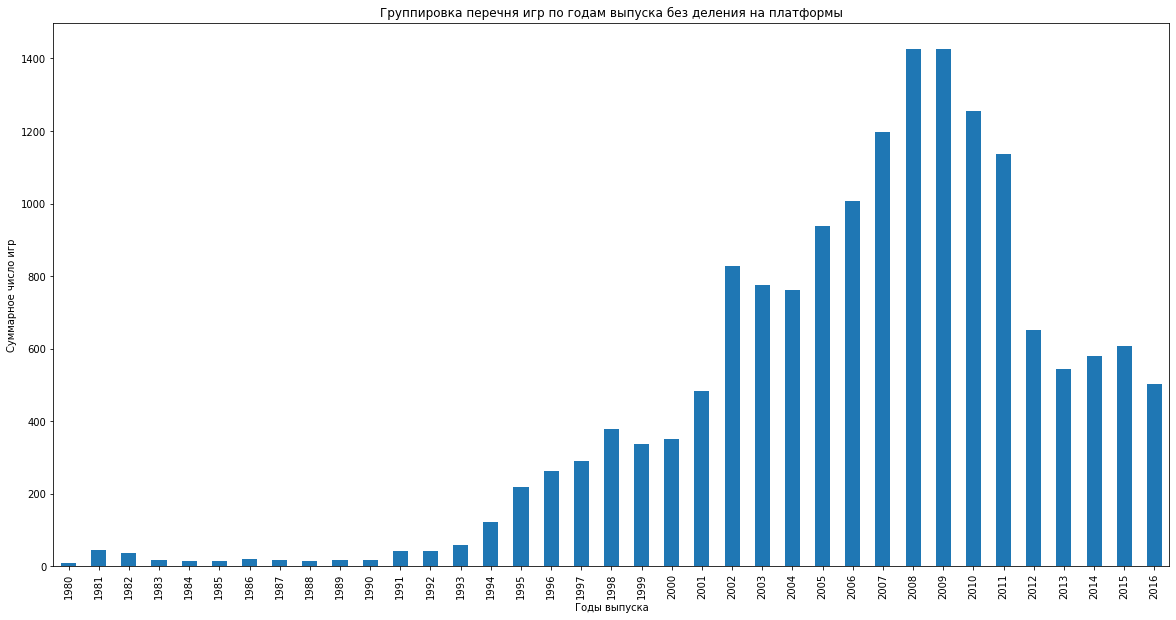

In [49]:
data['year_of_release'].value_counts().sort_index().plot(
    kind='bar', 
    figsize=(20,10),
    rot='vertical',
    title='Группировка перечня игр по годам выпуска без деления на платформы',
    xlabel='Годы выпуска',
    ylabel='Суммарное число игр'
                                                        )

plt.show()

Однако при рассчётах не было учтён тот момент, что в выводимой группировке не считаются игры для разных платформ. Т.е. если в в 2014 году вышла игра`FIFA 14` сразу для 9 платформ, то на графике выше все эти вариации просуммируются. Удалять для всего датасета подобные дубликаты не вижу смысла, поскольку они могут повлиять на дальнейшие исследования, исходя из поставленных задач. Но можно для решения текущей задачи избавиться от такого деления по платформам для одних и тех же игр. 

В результате обе столбчатые диаграммы похожи в части распределения игр, но отличаются их числом в разрезе лет. Притом на пике (в 2008-2009 годах) это отличие довольно сильно заметно и составляет около 400 игр.

In [50]:
duplicated_games_years = data.drop_duplicates(subset=['year_of_release', 'name'])

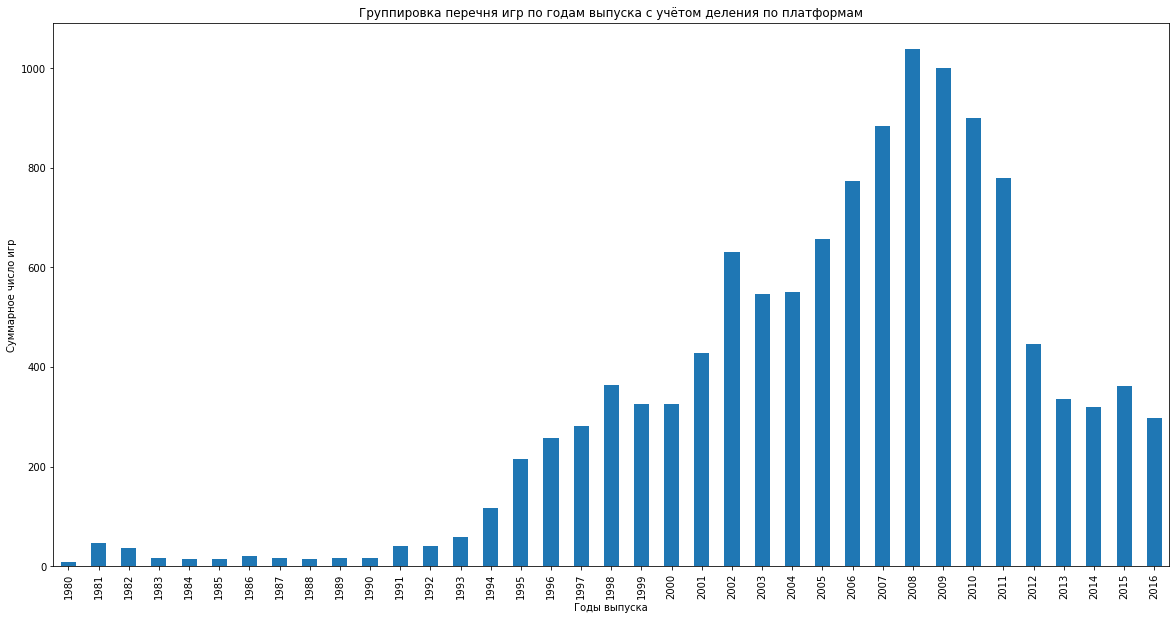

In [51]:
duplicated_games_years['year_of_release'].value_counts().sort_index().plot(
    kind='bar',
    figsize=(20,10),
    rot='vertical',
    title='Группировка перечня игр по годам выпуска с учётом деления по платформам',
    xlabel='Годы выпуска',
    ylabel='Суммарное число игр'
                                                        )

plt.show()

In [52]:
duplicated_games_years['year_of_release'].describe()

count    12195.000000
mean      2005.708897
std          6.157989
min       1980.000000
25%       2002.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

По графику виден  прирост продаж общего числа игр с 1994 по 2002 год. А далее график приобретает вид нормального распределения, достигая максимума продаж в 2008-2009 годы. 

Но чем нам оперировать далее для дальнейшего анализа? Возможно использовать годы, попадающие в 4-й квартиль. Но явно заметно, что в 2010-2011 годы происходит спад продаж, что на фоне других лет явно выделяется. А поскольку перед нами стоит цель составить прогноз на 2017 год (и далее), то видится нормальным оперировать данными, **начиная с 2014 года**.

### Анализ продаж по платформам
<span style="color:green">
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
<span>

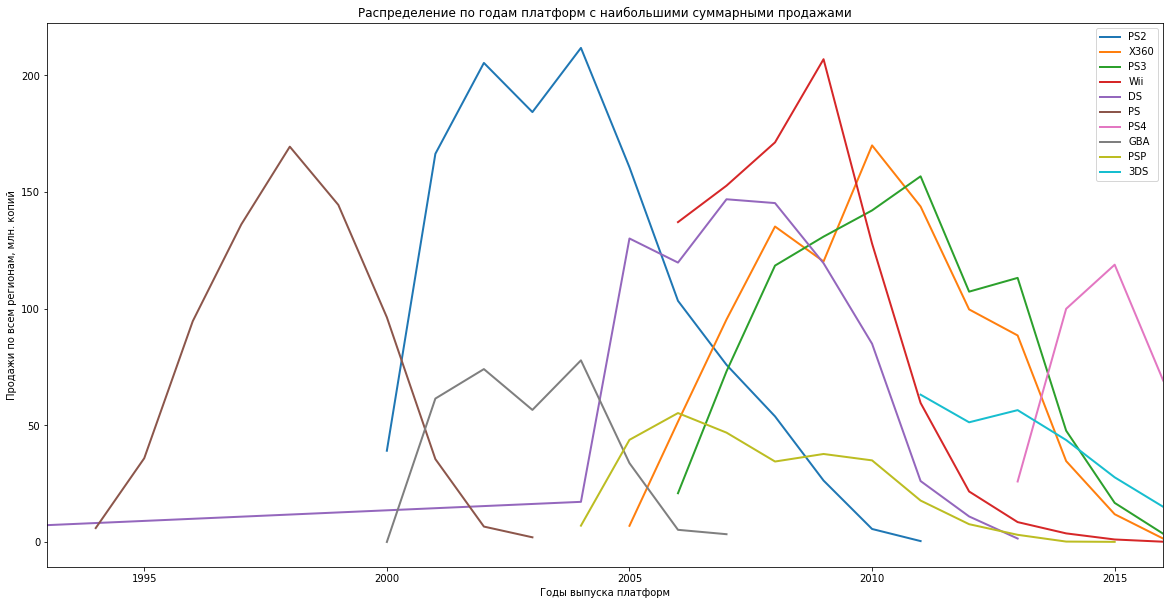

In [54]:
platform_sales = data.groupby('platform')['total_sales'].sum()

top_platforms = platform_sales.sort_values(ascending=False).head(10)

# вывод гистограмм распределения продаж по годам для каждой платформы
for platform in top_platforms.index:
    data[data['platform'] == platform].groupby('year_of_release')['total_sales'].sum().plot(
        label=platform, 
        linewidth=2,
        title='Распределение по годам платформ с наибольшими суммарными продажами',
        xlabel='Годы выпуска платформ',
        ylabel='Продажи по всем регионам, млн. копий',
        figsize=(20, 10),
        xlim=(1993,2016)
    )
plt.legend()
plt.show()

На графике представлена группировка 10 самых продаваемых платформ в их распределении по годам. Популярность платформ определяется, исходя из значения параметра `total_sales`, добавленного ранее. Для каждой платформы подсчитаны суммирующие продажи, но отображаются только 10 из них.

По графику наблюдается жизненный цикл платформ, составляющий 10-12 лет с момент своего появления. Однако это может сильно варьироваться в зависимости от конкретной платформы и ситуации на рынке видеоигр. Так платформа `DS` от фирмы Nintendo существовала с 1980-х, завершив продажи к 2013 году. Можно предположить, что, в отличие от серии `PlayStation`, для которой в датасете присутствует каждая конкретная модель игровой приставки, для `DS` различные версии не рассматривались. Поэтому платформа кажется столь живучей. Модификации видны хотя бы на примере появления интереса к `DS` в интервале с 2005 по 2008 годы.

Поведение `DS` в некоторой степени похоже на случай с серией платформ `PlayStation`. Относительно спокойный взлёт, а затем падение до появления новой версии платформы. Интервал появления новой версии составляет около 7 лет. 

Для ряда топовых платформ (`GBA`, `PS2`, `PS3`, `DS`, `X360`) наблюдается характерный выход на плато продаж с последующим падением и выправлением ситуации на грядущий год. Видимо это связано с компенсирующими факторами (например, проведение яркой рекламной программы), предпринимаемые организациями-разработчиками игры для возобновления интереса к своим продуктам на указанных платформах. 

### Формирование данных за соответствующий актуальный период
<span style="color:green">
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
<span>

**вводная часть**

In [55]:
platform_sales_top = data[data['platform'].isin(top_platforms.index)].pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).query('year_of_release >= 2013')

platform_sales_top.sort_values(by='year_of_release', ascending=False)

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
2016,15.14,NaN,NaN,NaN,NaN,3.60,69.25,NaN,0.18,1.52
2015,27.78,NaN,NaN,NaN,NaN,16.82,118.90,0.12,1.14,11.96
2014,43.76,NaN,NaN,NaN,NaN,47.76,100.00,0.24,3.75,34.74
2013,56.57,1.54,NaN,NaN,NaN,113.25,25.99,3.14,8.59,88.58


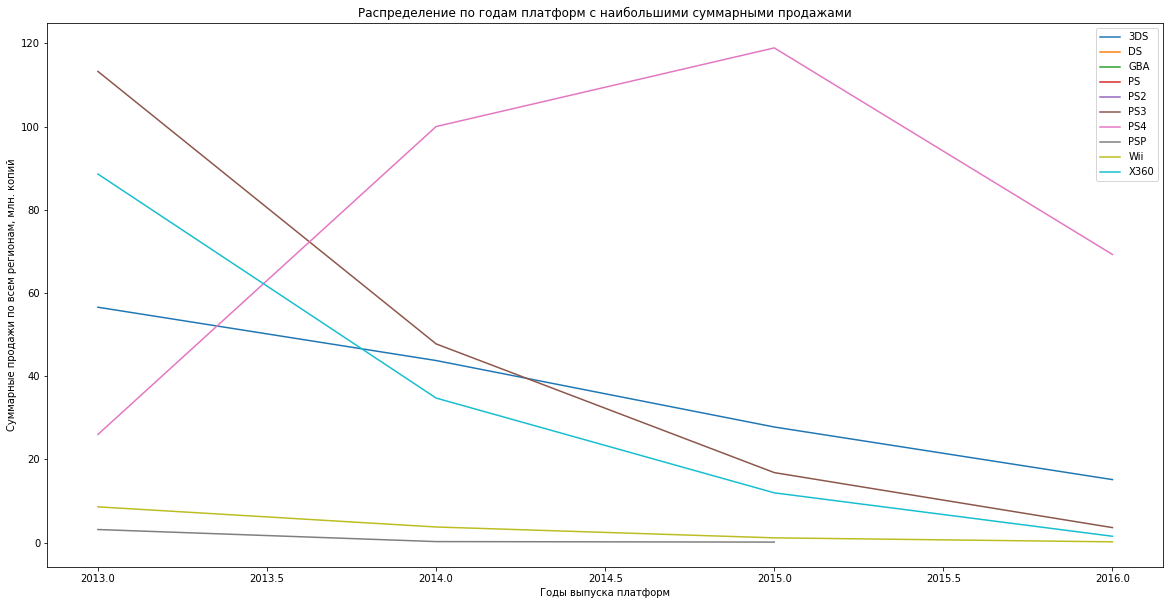

In [56]:
platform_sales_top.plot(
    kind='line', 
    figsize=(20, 10),
    title='Распределение по годам платформ с наибольшими суммарными продажами',
    xlabel='Годы выпуска платформ',
    ylabel='Суммарные продажи по всем регионам, млн. копий'
                       )

plt.legend()
plt.show()

~~По данным графикам видно число продаж игр на популярных платформ в течение времени, своего рода, жизненный цикл платформы. Ярко бросается в глаза пример с семейством `PS`. Средний срок жизни - от 8 до 12 лет. Например, активные продажи `PS` зафиксированы в 1994 год, а завершились они в 2002. За два года до этого начались активные продажи `PS2`, заметно затихающие с 2010. `PS3` активно вышел на рынок в 2006, т.е. через 6 лет после начала продаж предшественника и за 4 года до его затухания. Наконец, `PS4` стал активен на рынке в 2013, т.е. через 7 лет после старта PS3. Таким образом, налицо тенденция появления нового покорения линейки `PlayStation` через 6-7 лет. И действительно, `PS5` (этого нет в датасете, но легко найти в Сети) появился на рынке в 2020 году.~~

Можно сделать вывод о заметном росте продаж для платформ-лидеров `Стримчика` после 2005 года. Если до 2000 года заметным лидером выступало первое поколение `PS`, а затем с 2000 года наблюдался бум на игры для портативных приставок Game Boy Advance, то после 2005 на рынке появились конкуренты. С 2013 года в лидеры рынка вырвался `PS4`.

### Выбор нескольких потенциально прибыльных платформ
<span style="color:green">
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
<span>

На основе предыдущих умозаключений принимаем решение сформировать новый актуальный период, но уже с 2013 года (включительно). Видно, что некоторые платформы _отвалились_, поскольку за выбранный интервал времени продаж игр нет. Убираем такие платформы. Также убираем платформу `PSP`, поскольку продажи там минимальные, а на момент неполного 2016 года и вовсе отсутствуют.

In [58]:
platform_sales_top.sort_values(by='year_of_release', ascending=False)

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
2016,15.14,NaN,NaN,NaN,NaN,3.60,69.25,NaN,0.18,1.52
2015,27.78,NaN,NaN,NaN,NaN,16.82,118.90,0.12,1.14,11.96
2014,43.76,NaN,NaN,NaN,NaN,47.76,100.00,0.24,3.75,34.74
2013,56.57,1.54,NaN,NaN,NaN,113.25,25.99,3.14,8.59,88.58


In [59]:
platform_sales_top = platform_sales_top.drop(['DS', 'GBA', 'PS', 'PS2', 'PSP'], axis=1).sort_values(by='year_of_release', ascending=False)
platform_sales_top

platform,3DS,PS3,PS4,Wii,X360
year_of_release,,,,,
2016,15.14,3.60,69.25,0.18,1.52
2015,27.78,16.82,118.90,1.14,11.96
2014,43.76,47.76,100.00,3.75,34.74
2013,56.57,113.25,25.99,8.59,88.58


In [60]:
platforms_list = list(platform_sales_top.columns)
data_actual_period = data[data['platform'].isin(platforms_list)]

data_actual_period = data_actual_period[data_actual_period['year_of_release'] >= 2013]
data_actual_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,R-S,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,R-S,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам
<span style="color:green">
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
<span>

Строим диаграмму размаха для потенциально прибыльных платформ за выбранный период

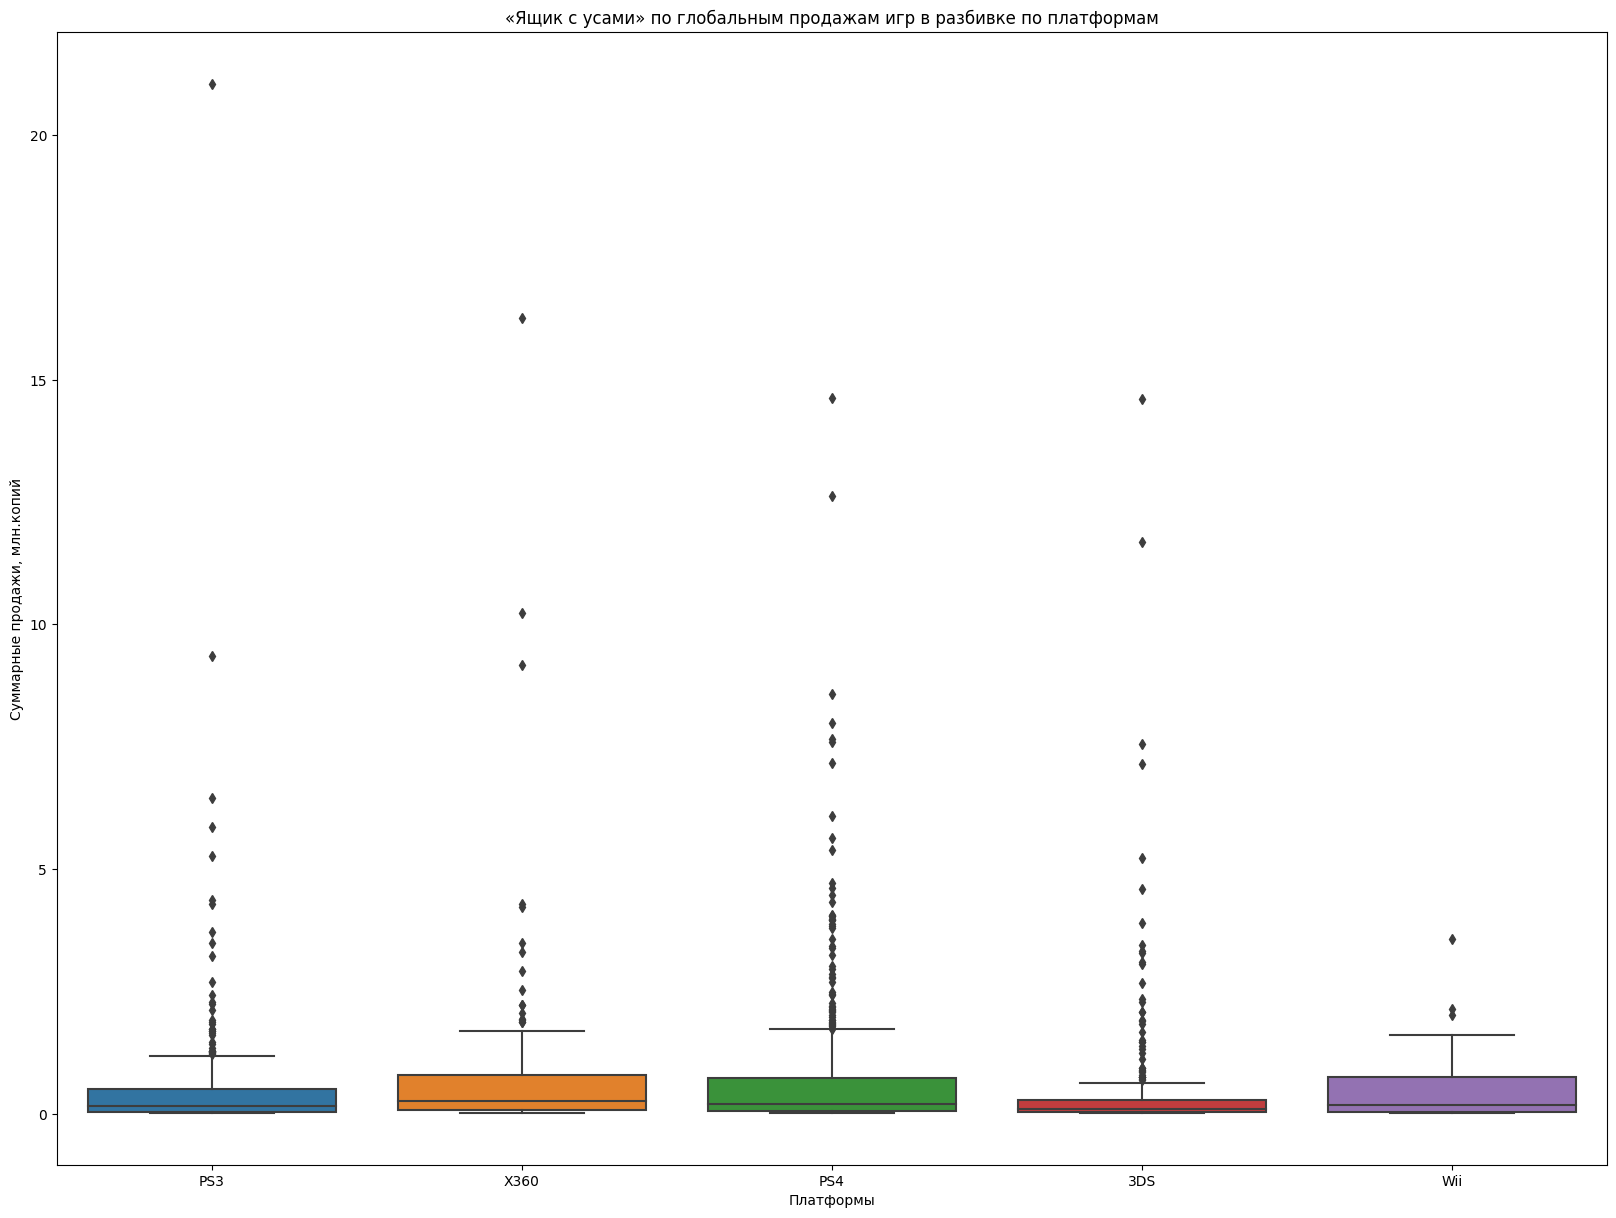

In [61]:
fig, ax = plt.subplots(figsize=(20, 15), dpi=100)

sns.boxplot(
    x='platform', 
    y='total_sales', 
    data=data_actual_period[data_actual_period['platform'].isin(platforms_list)],
    ax=ax    
           )

ax.set_title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам')
ax.set_xlabel('Платформы')
ax.set_ylabel('Суммарные продажи, млн.копий')
plt.show()

На графике видны существенные выбросы для 4 из 5 платформ, но особенно для `PS3`. Увеличим масштаб до пределов нормальных значений (в размерах 1.5 межквартильного размаха), чтобы сделать выводы.

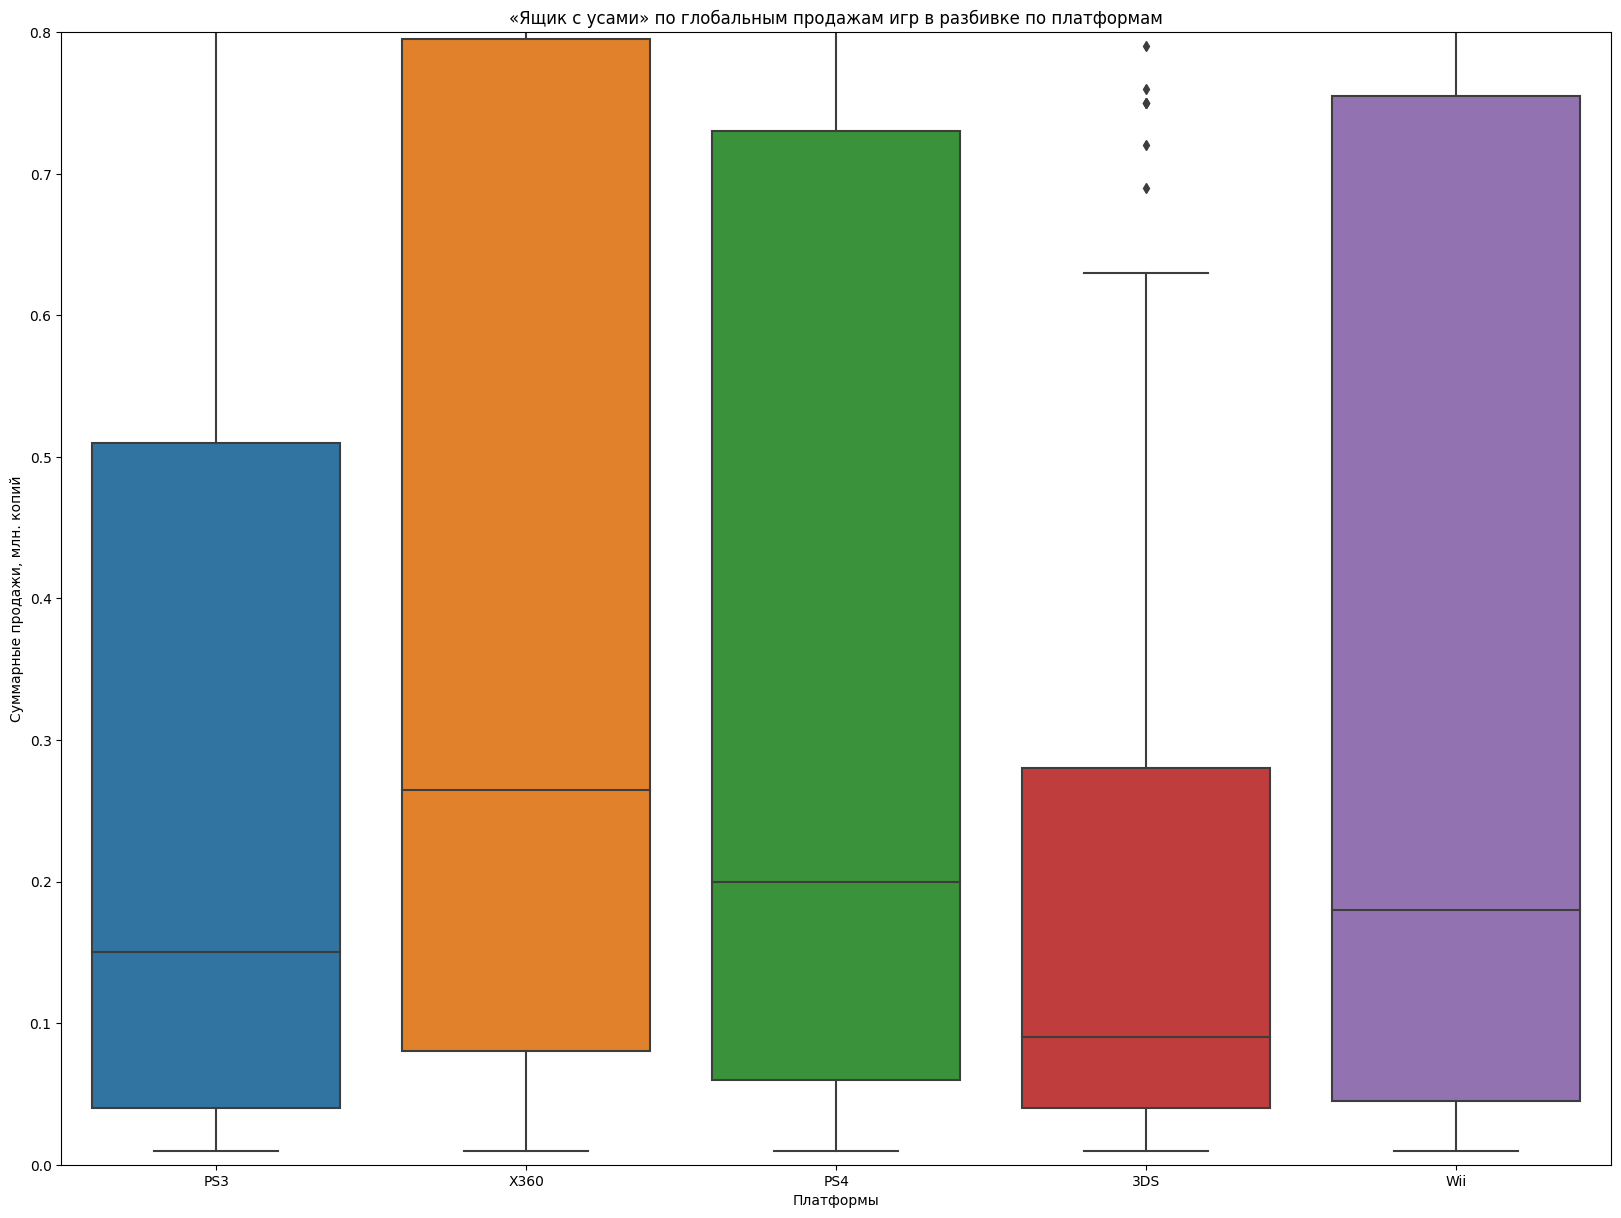

In [62]:
fig, ax = plt.subplots(figsize=(20, 15), dpi=100)

sns.boxplot(
    x='platform', 
    y='total_sales', 
    data=data_actual_period[data_actual_period['platform'].isin(platforms_list)],
    ax=ax    
           )

ax.set_title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам')
ax.set_ylim(0, 0.8)
ax.set_xlabel('Платформы'),
ax.set_ylabel('Суммарные продажи, млн. копий')

plt.show()

Диаграмма размаха показывает положение вещей, представленное ниже.

1. Медианное значение показывает, какие суммарные продажи наиболее типичны для каждой из игровых платформ. Таким образом, наиболее высокий типичный уровень продаж игр у платформы `X360`. А в целом для лидирующих платформ продажи варьируются на уровне от 100 до 300 тысяч копий на `Стимчике`.

2. Нижняя и верхняя квартили показывают низкие и высокие значения продаж для каждой платформы соответственно. Для каждой из платформ нижняя граница приблизительно соразмерно и находится в пределах от 40 тысяч (для `PS3` и `3DS`) до 80 тысяч (для `X360`). А вот верхняя граница различается существенно. Для `X360` она составляет 795 тысяч копий. Наиболее границы говорят в контексте интерквартильного размаха. Это диапазон сумм продаж, который является наиболее типичным для каждой платформы. Так вот для `X360` этот показатель составляет 715 тысяч копий. 

3. При этом крайне важно, что наиболее востребованная в 2015-2016 года платформа `PS4` выдаёт также сопоставимый результат в 670 тысяч для диапазона наиболее типичных продаж.

4. Также крайне показательным значением служат выбросы. В контексте продаж игр для разных платформ выбросы могут указывать на наличие очень успешных или неудачных игр на каждой из платформ (тут всё же случай, где больше успешных продаж). Так несомненный бестселлер для платформы `PS3` принёс доход магазину по стоимости, сопоставимый с продажей более 20 млн. копий.

5. Наименее перспективной платформой из представленного списка, на наш взгляд, выступает `3DS`. 

### Анализ влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков
<span style="color:green">
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
<span>

В качестве популярной платформы рассмотрим `PS4`. На первых двух диаграммах показана связь между суммарными продажами игр на платформе и выставленными оценками пользователей и критиков. 

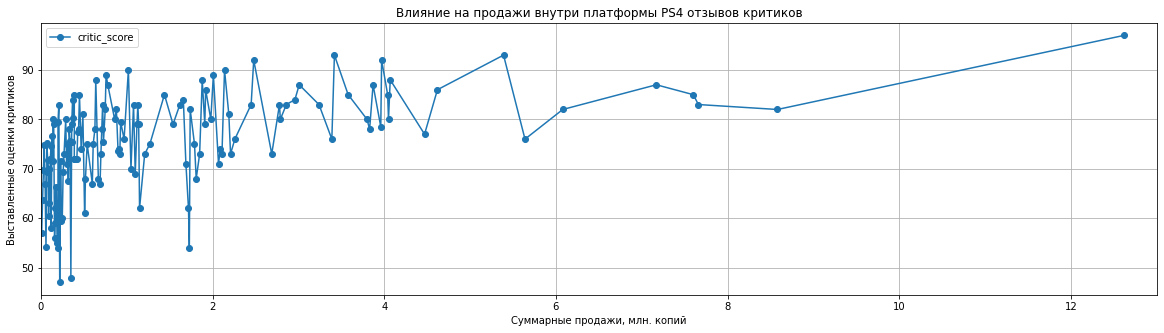

In [63]:
data_actual_period.query(
    'platform == "PS4"'
                        ).pivot_table(
    index='total_sales', 
    values='critic_score'
                                     ).plot(
    style='o-',
    title='Влияние на продажи внутри платформы PS4 отзывов критиков',
    xlabel='Суммарные продажи, млн. копий',
    ylabel='Выставленные оценки критиков',
    grid=True,
    figsize=(20, 5),
    xlim=(0,13)
                                     )

plt.show()

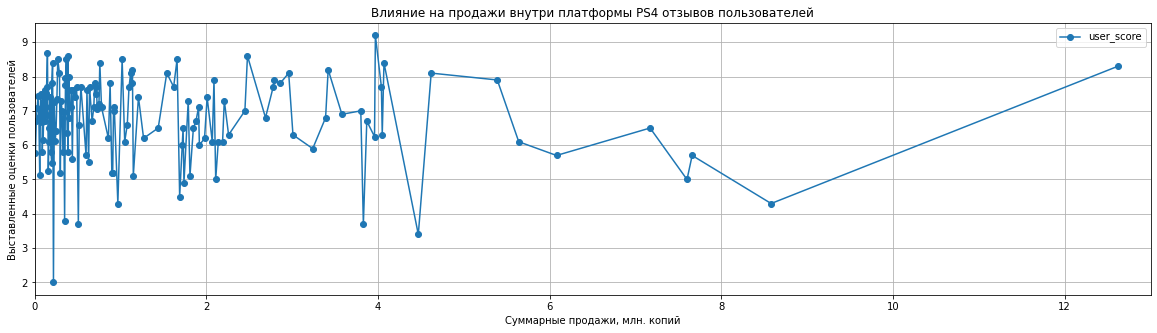

In [68]:
data_actual_period.query(
    'platform == "PS4"'
                        ).pivot_table(
    index='total_sales', 
    values='user_score'
                                     ).plot(
    style='o-',
    title='Влияние на продажи внутри платформы PS4 отзывов пользователей',
    xlabel='Суммарные продажи, млн. копий',
    ylabel='Выставленные оценки пользователей',
    grid=True,
    figsize=(20, 5),
    xlim=(0,13)
                                     )

plt.show()

По данным графикам видна слабая зависимость между оценками, что критиков, что пользователей, и продажами игр для `PS4`. Так график отображает ситуацию, когда самая продаваемая игра также является и самой хвалебной со стороны критиков. И вообще наиболее прибыльные игры получали, как правило, оценку выше 70 баллов от критиков. При этом в сегменте продаж до 2 млн.копий разброс оценок крайне высок.

Ситуация с оценками пользователей слегка отличается. Тут также самая продаваемая игра имеет хвалебные оценки, но, на сей раз, далеко не самые высокие. Более того, для игр в районе продаж около 4 млн. копий (а не только до 2 млн., как в случае выше) разброс пользовательских оценок достаточно широк. Что говорит о более слабой зависимости.

Построим диаграмму корреляции между оценками пользователей и критиков на продажи `PS4`

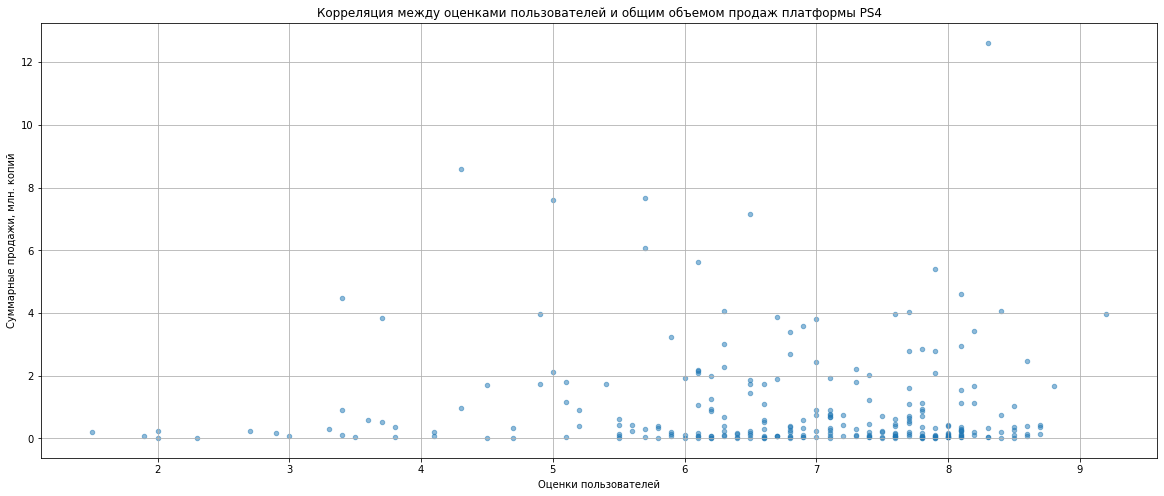

Коэффициент корреляции между оценками пользователей и общим объемом продаж: -0.03195711020455685


In [65]:
data_actual_period.query(
        'platform == "PS4"'
          ).plot(
        kind='scatter', 
        x='user_score',
        y='total_sales', 
        alpha=0.5, 
        figsize=(20, 8), 
        title='Корреляция между оценками пользователей и общим объемом продаж платформы PS4',
        xlabel='Оценки пользователей',
        ylabel='Суммарные продажи, млн. копий',
        grid=True
            )

corr_user_score_ps4 = data_actual_period.query('platform == "PS4"')[['user_score', 'total_sales']].dropna().corr().iloc[0, 1]

plt.show()

print('Коэффициент корреляции между оценками пользователей и общим объемом продаж:', corr_user_score_ps4)

На основании данных, представленных на диаграмме корреляции, можно сделать следующие выводы:

- корреляция между отзывами пользователей и продажами игр на платформе `PS4` составляет около -3%, 
- оценки пользователей не имеют значительного влияния на продажи игр,
- это может быть связано с тем, что оценки пользователей могут быть более субъективными и зависеть от личных предпочтений, в то время как оценки критиков обычно основаны на более объективных критериях,
- иначе говоря, оценки пользователей оказывают незначительное влияние на объем продаж игр на платформе `PS4`,
- также на графике можно заметить, что большинство игр имеют средние (от 5,5 баллов) и выше оценки пользователей, но относительно небольшие продажи,
- однако есть и выбросы, игры с высокими продажами и высокими оценками, которые могут повлиять на общую картину; для платформы `PS4` фигурирует несколько игр с относительно высокими продажами, но низкими или средними оценками пользователей. 

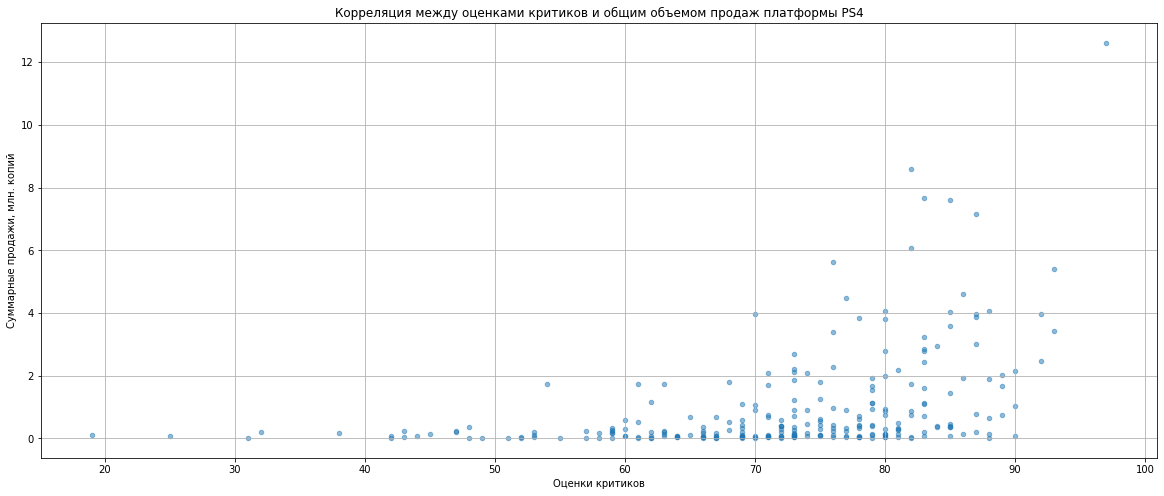

Коэффициент корреляции между оценками критиков и общим объемом продаж: 0.40656790206178123


In [66]:
data_actual_period.query(
        'platform == "PS4"'
          ).plot(
        kind='scatter', 
        x='critic_score',
        y='total_sales', 
        alpha=0.5, 
        figsize=(20, 8), 
        title='Корреляция между оценками критиков и общим объемом продаж платформы PS4',
        xlabel='Оценки критиков',
        ylabel='Суммарные продажи, млн. копий',
        grid=True
                )

corr_critic_score_ps4 = data_actual_period.query('platform == "PS4"')[['critic_score', 'total_sales']].dropna().corr().iloc[0, 1]

plt.show()

print('Коэффициент корреляции между оценками критиков и общим объемом продаж:', corr_critic_score_ps4)

На основании данных, представленных на диаграмме рассеяния, можно сделать следующие выводы:

- между оценками критиков и общим объемом продаж на платформе `PS4` есть умеренная положительная связь (40%),
- это означает, что игры с более высокими оценками критиков, скорее всего, имеют больший успех среди покупателей, 
- однако коэффициент корреляции не очень высокий, поэтому этот фактор может быть не единственной причиной успеха игры на платформе,
- другие факторы, такие как маркетинговая кампания, жанр игры, качество графики и геймплея, могут оказывать большее влияние на продажи,
- как и в случае с оценками пользователей, есть выбросы, которые на общую картину влияют в некоторой, достаточно слабой степени.

### Соотнесение выводов с продажами игр на других платформах
<span style="color:green">
Соотнесите выводы с продажами игр на других платформах.
<span>

Для других платформ из Топ-5 построим диаграммы корреляции между оценками (пользователей/критиков) и суммарными продажами, проверив, есть ли между этими оценками линейная связь.

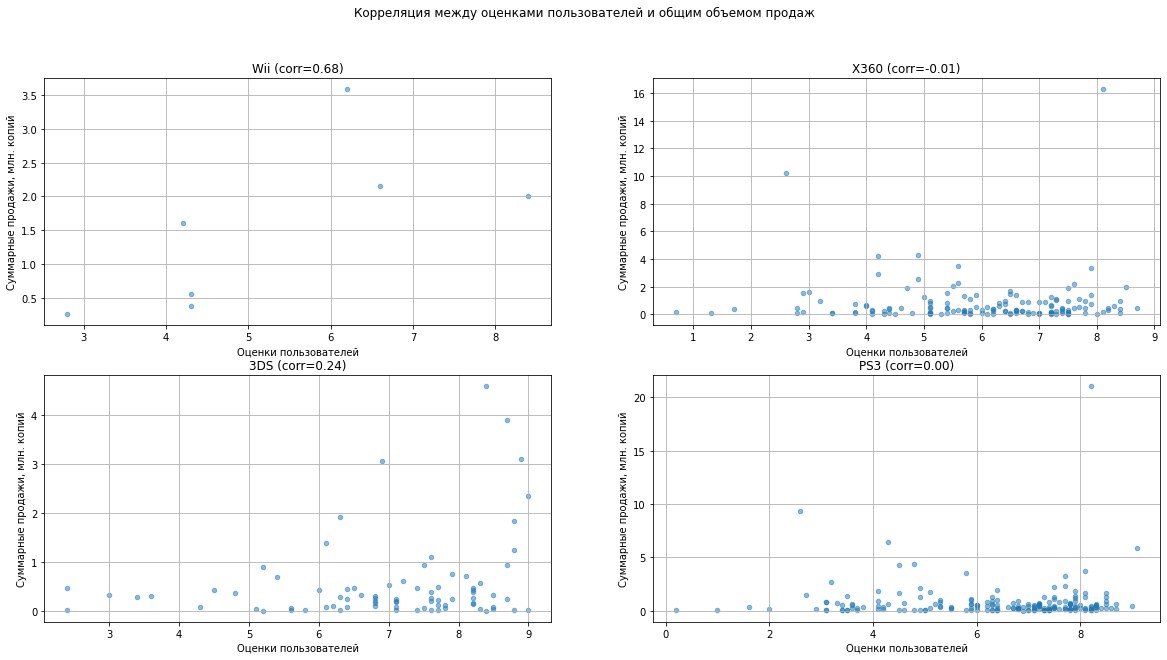

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Корреляция между оценками пользователей и общим объемом продаж')

# subplot для Wii
data_actual_period.query(
        'platform == "Wii"'
          ).plot(
        kind='scatter',
        ax=axs[0, 0],
        x='user_score', 
        y='total_sales', 
        alpha=0.5,
        title='Wii',
        xlabel='Оценки пользователей',
        ylabel='Суммарные продажи, млн. копий',
        grid=True
                )
corr_user_score_wii = data_actual_period.query('platform == "Wii"')[['user_score', 'total_sales']].dropna().corr().iloc[0, 1]
axs[0, 0].set_title(f'Wii (corr={corr_user_score_wii:.2f})')

# subplot для X360
data_actual_period.query(
        'platform == "X360"'
          ).plot(
        kind='scatter',
        ax=axs[0, 1],
        x='user_score', 
        y='total_sales', 
        alpha=0.5,
        title='X360',
        xlabel='Оценки пользователей',
        ylabel='Суммарные продажи, млн. копий',
        grid=True
                )
corr_user_score_x360 = data_actual_period.query('platform == "X360"')[['user_score', 'total_sales']].dropna().corr().iloc[0, 1]
axs[0, 1].set_title(f'X360 (corr={corr_user_score_x360:.2f})')

# subplot для 3DS
data_actual_period.query(
        'platform == "3DS"'
          ).plot(
        kind='scatter',
        ax=axs[1, 0],
        x='user_score', 
        y='total_sales', 
        alpha=0.5,
        title='3DS',
        xlabel='Оценки пользователей',
        ylabel='Суммарные продажи, млн. копий',
        grid=True
                )
corr_user_score_3ds = data_actual_period.query('platform == "3DS"')[['user_score', 'total_sales']].dropna().corr().iloc[0, 1]
axs[1, 0].set_title(f'3DS (corr={corr_user_score_3ds:.2f})')


# subplot для PS3
data_actual_period.query(
        'platform == "PS3"'
          ).plot(
        kind='scatter',
        ax=axs[1, 1],
        x='user_score', 
        y='total_sales', 
        alpha=0.5,
        title='PS3',
        xlabel='Оценки пользователей',
        ylabel='Суммарные продажи, млн. копий',
        grid=True
                )
corr_user_score_ps3 = data_actual_period.query('platform == "PS3"')[['user_score', 'total_sales']].dropna().corr().iloc[0, 1]
axs[1, 1].set_title(f'PS3 (corr={corr_user_score_ps3:.2f})')

plt.show()

Для других платформ коэффициент корреляции между оценками пользователей и суммарными продажами разнообразный (от -0.01 до 0.68), что говорит о различной связи между этими переменными для разных платформ. Данное сравнение с `PS4` (коэффициент корреляции 0.40), говорит о более сильной связи между оценками пользователей и продажами на этой платформе, чем у актуального поколения `PlayStation` за исследуемый период.

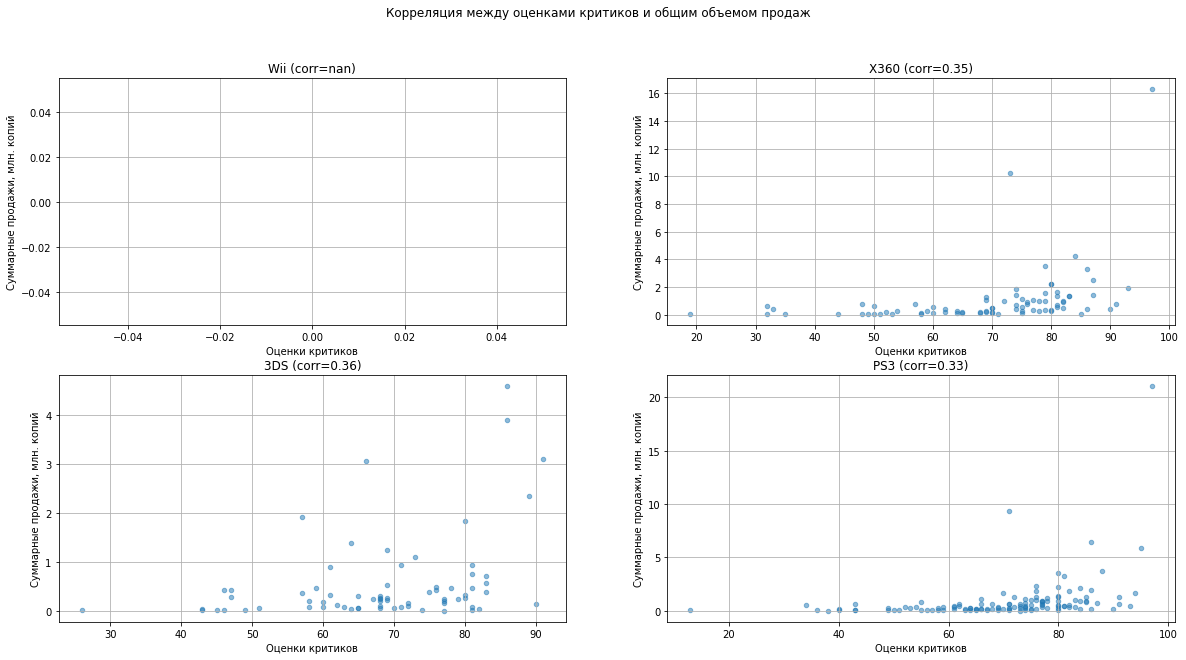

In [68]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Корреляция между оценками критиков и общим объемом продаж')

# subplot для Wii
data_actual_period.query(
        'platform == "Wii"'
          ).plot(
        kind='scatter',
        ax=axs[0, 0],
        x='critic_score', 
        y='total_sales', 
        alpha=0.5,
        title='Wii',
        xlabel='Оценки критиков',
        ylabel='Суммарные продажи, млн. копий',
        grid=True
                )
corr_critic_score_wii = data_actual_period.query('platform == "Wii"')[['critic_score', 'total_sales']].dropna().corr().iloc[0, 1]
axs[0, 0].set_title(f'Wii (corr={corr_critic_score_wii:.2f})')

# subplot для X360
data_actual_period.query(
        'platform == "X360"'
          ).plot(
        kind='scatter',
        ax=axs[0, 1],
        x='critic_score', 
        y='total_sales', 
        alpha=0.5,
        title='X360',
        xlabel='Оценки критиков',
        ylabel='Суммарные продажи, млн. копий',
        grid=True
                )
corr_critic_score_x360 = data_actual_period.query('platform == "X360"')[['critic_score', 'total_sales']].dropna().corr().iloc[0, 1]
axs[0, 1].set_title(f'X360 (corr={corr_critic_score_x360:.2f})')

# subplot для 3DS
data_actual_period.query(
        'platform == "3DS"'
          ).plot(
        kind='scatter',
        ax=axs[1, 0],
        x='critic_score', 
        y='total_sales', 
        alpha=0.5,
        title='3DS',
        xlabel='Оценки критиков',
        ylabel='Суммарные продажи, млн. копий',
        grid=True
                )
corr_critic_score_3ds = data_actual_period.query('platform == "3DS"')[['critic_score', 'total_sales']].dropna().corr().iloc[0, 1]
axs[1, 0].set_title(f'3DS (corr={corr_critic_score_3ds:.2f})')


# subplot для PS3
data_actual_period.query(
        'platform == "PS3"'
          ).plot(
        kind='scatter',
        ax=axs[1, 1],
        x='critic_score', 
        y='total_sales', 
        alpha=0.5,
        title='PS3',
        xlabel='Оценки критиков',
        ylabel='Суммарные продажи, млн. копий',
        grid=True
                )
corr_critic_score_ps3 = data_actual_period.query('platform == "PS3"')[['critic_score', 'total_sales']].dropna().corr().iloc[0, 1]
axs[1, 1].set_title(f'PS3 (corr={corr_critic_score_ps3:.2f})')

plt.show()

Для всех платформ, кроме `Wii`, можно сделать вывод, что оценки критиков имеют некоторое влияние на продажи игр. Наибольшее влияние оценки критиков оказывают на продажи игр для `PS3` и `X360`. Однако точно утверждать об имеющейся линейной зависимости нельзя, поскольку не учитывается ряд других факторов.

### Анализ общего распределения игр по жанрам
<span style="color:green">
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
<span>

Построим графики по суммарным, медианным и средним продажам в разрезе жанров

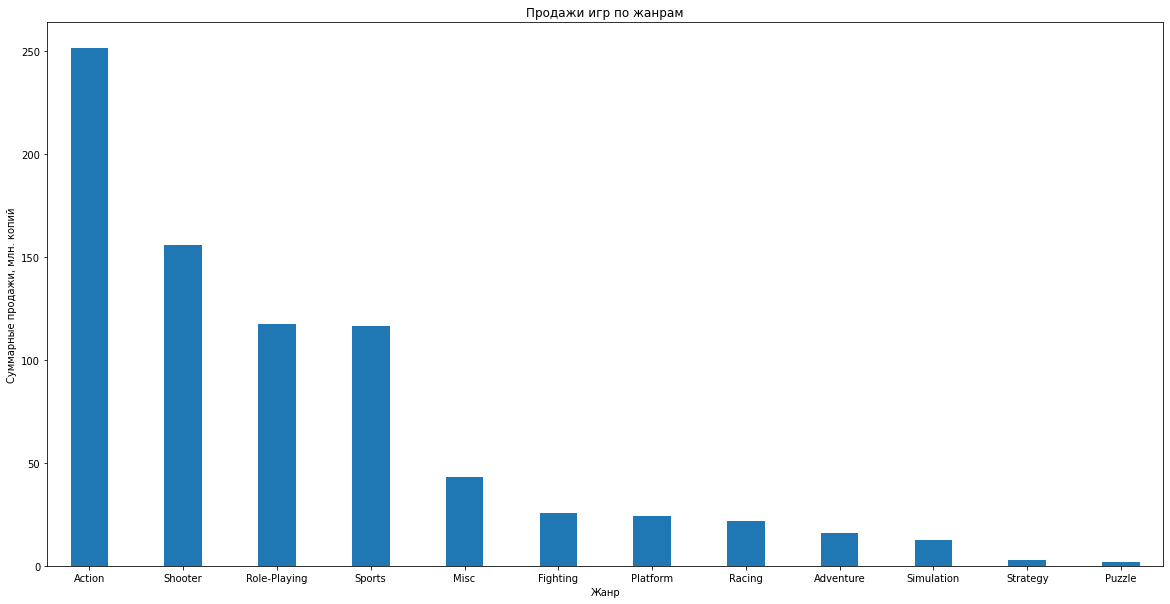

In [102]:
genre_sales = data_actual_period.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre_sales.plot(
    kind='bar', 
    figsize=(20,10),
    title='Продажи игр по жанрам', 
    xlabel='Жанр', 
    ylabel='Суммарные продажи, млн. копий',
    width=0.4,
    rot=0,
    orientation='vertical'
                )

plt.show()

На столбчатой диаграмме видно, что более всех продаются игры жанра `Action`. Менее всего продаются стратегии и паззлы. На втором по популярности месте находятся игры жанра `Shooter`, т.е. стрелялки.

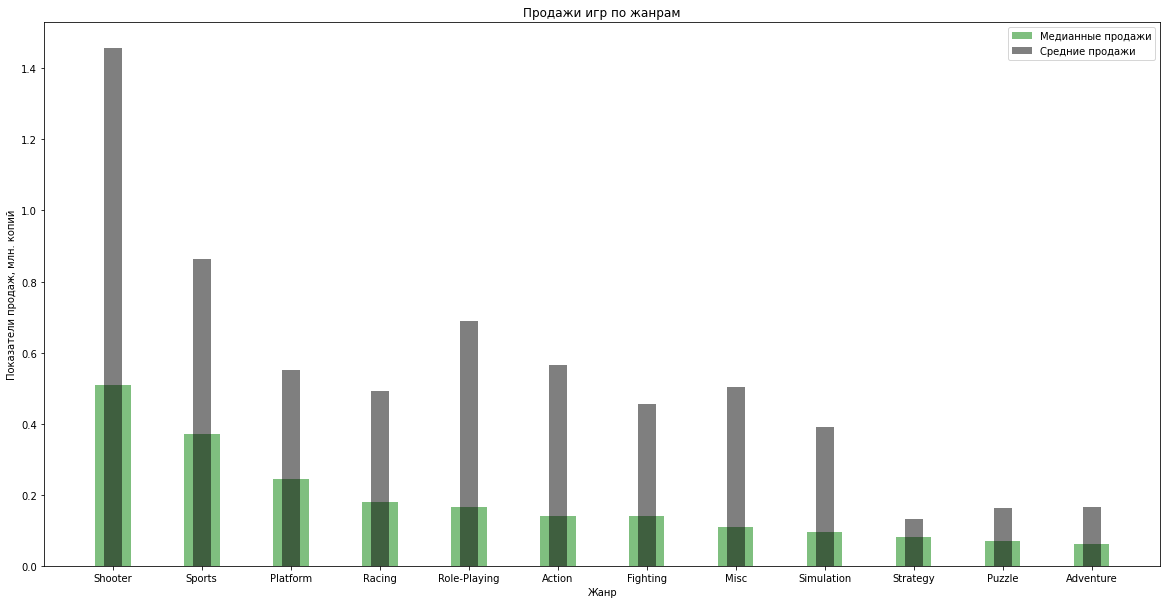

In [99]:
genre_sales_mean = data_actual_period.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
genre_sales_median = data_actual_period.groupby('genre')['total_sales'].median().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(20,10))

ax.bar(
    genre_sales_median.index, 
    genre_sales_median.values, 
    width=0.4, 
    alpha=0.5, 
    color='green', 
    label='Медианные продажи'
      )
ax.bar(genre_sales_mean.index, 
       genre_sales_mean.values, 
       width=0.2, 
       alpha=0.5, 
       color='black', 
       label='Средние продажи'
      )

ax.set_title('Продажи игр по жанрам')
ax.set_xlabel('Жанр')
ax.set_ylabel('Показатели продаж, млн. копий')
ax.legend()

plt.show()

На графике медианных и средних значений фигурируют иные результат, нежели на графике с суммами. Самой популярной игрой являются игры жанра `Shooter`. Это говорит, что в данном разрезе игры более оптимально продаются, если речь идёт именно о распределении, а не о продаже общего числа игр. Медианное значение продаж игр жанра `Action` слабо выделяется на фоне иных жанров, а вот от лидеров отстаёт существенно. Значит среди экшна много проходных игр, жизненный цикл которых короток. Такие игры появились, продались и пропали; но их много. А вот стрелялки, напротив, продаются крайне успешно вследствие того, что разработчики постоянно выпускают патчи и поддерживают их выход. 

Также необходимо отметить тот факт, что подтверждается наш вывод, сделанный ранее, в ходе решения задачи [обработки пропусков для параметра `rating`](#Обработка-пропусков-для-столбца-rating). За счёт многочисленных неоценок, главным образом, игр жанра `Action` картина предстаёт в том виде, что отображается на графиках медианных и суммарных значений. Т.е. ряд тех же экшнов не оценен с т.зрения рейтинга и не попал в выборку. 

Что характерно, среди "аутсайдеров" значится опять же жанры `Strategy` и `Puzzle`. Это значит, что в магазине не продаются "проходные" игры. Просто жанр такой незавлекательный для публики.

## Составление портрета пользователя каждого региона
<span style="color:green">
Определите для пользователя каждого региона (NA, EU, JP):

* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?
<span>

### Топ-5 самых популярных платформ
<span style="color:green">
Определите для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). 
Опишите различия в долях продаж.
<span>

Используем сводную таблицу для всех регионов (кроме остальных стран), дабы использовать в дальнейшем

In [71]:
sales_by_region_platform = pd.pivot_table(
    data_actual_period, 
    values=[
        'na_sales', 
        'eu_sales', 
        'jp_sales'
                        ], 
    index='platform', 
    aggfunc='sum'
                                         )

#### Топ-5 платформ для Северной Америки

In [72]:
na_platforms = sales_by_region_platform.sort_values(by='na_sales', ascending=False)['na_sales'].head(5)
na_platforms

platform
PS4     108.74
X360     81.66
PS3      63.50
3DS      38.20
Wii       6.56
Name: na_sales, dtype: float64

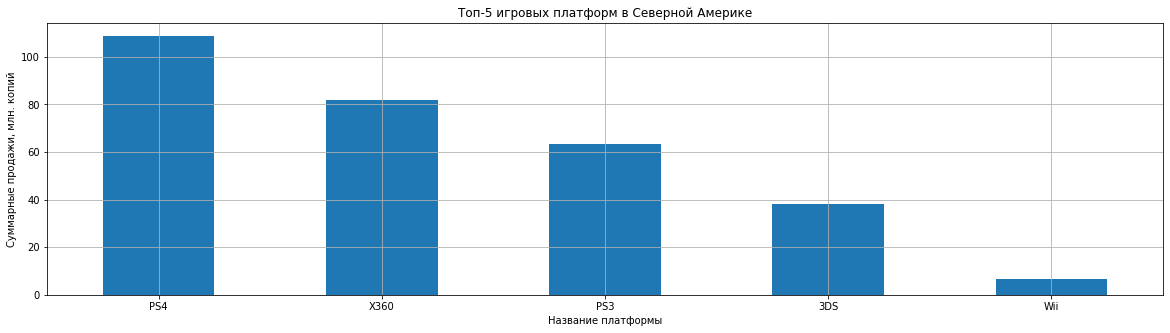

In [73]:
na_platforms.plot(
    kind='bar', 
    y='platform', 
    figsize=(20,5),
    title='Топ-5 игровых платформ в Северной Америке', 
    xlabel='Название платформы', 
    ylabel='Суммарные продажи, млн. копий',
    grid=True,
    rot='horizontal'
                 )

plt.show()

#### Топ-5 платформ для Европы

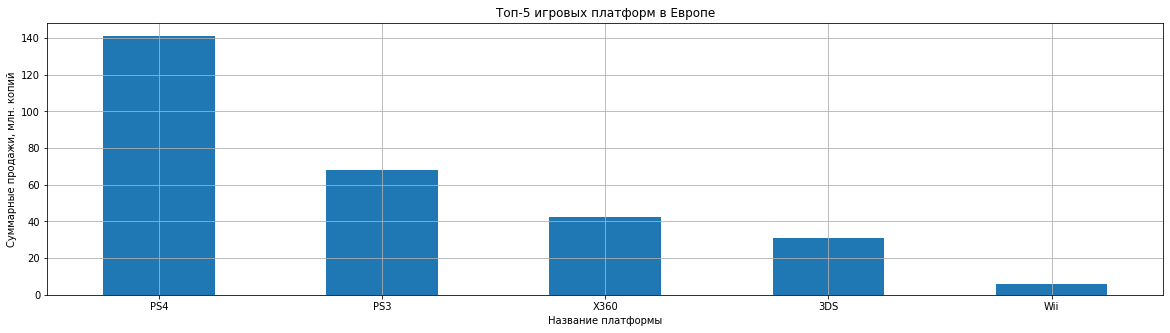

In [74]:
eu_platforms = sales_by_region_platform.sort_values(by='eu_sales', ascending=False)['eu_sales'].head(5)
eu_platforms.plot(
    kind='bar', 
    y='platform',
    figsize=(20, 5),
    title='Топ-5 игровых платформ в Европе', 
    xlabel='Название платформы', 
    ylabel='Суммарные продажи, млн. копий',
    grid=True,
    rot='horizontal'
                 )

plt.show()

In [75]:
eu_platforms = sales_by_region_platform.sort_values(by='eu_sales', ascending=False)['eu_sales'].head(5)
eu_platforms

platform
PS4     141.09
PS3      67.81
X360     42.52
3DS      30.96
Wii       5.93
Name: eu_sales, dtype: float64

#### Топ-5 платформ для Японии

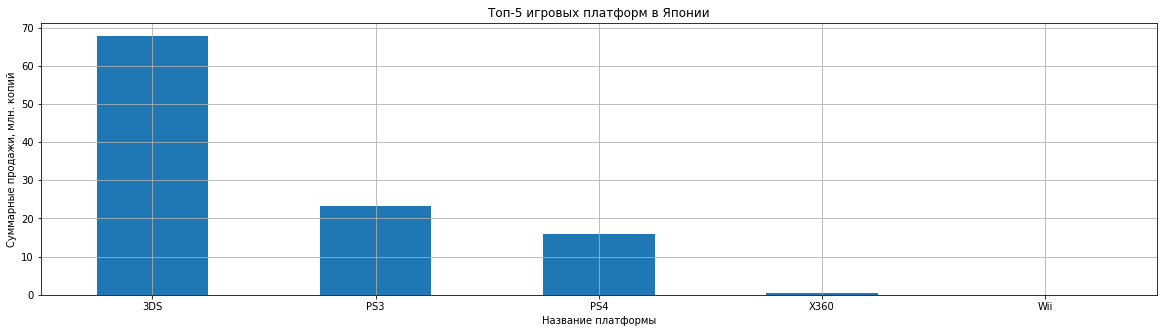

In [76]:
jp_platforms = sales_by_region_platform.sort_values(by='jp_sales', ascending=False)['jp_sales'].head(5)
jp_platforms.plot(
    kind='bar', 
    y='platform',
    figsize=(20, 5),
    title='Топ-5 игровых платформ в Японии', 
    xlabel='Название платформы', 
    ylabel='Суммарные продажи, млн. копий',
    grid=True,
    rot='horizontal'
                 )

plt.show()

#### Различия в долях продаж


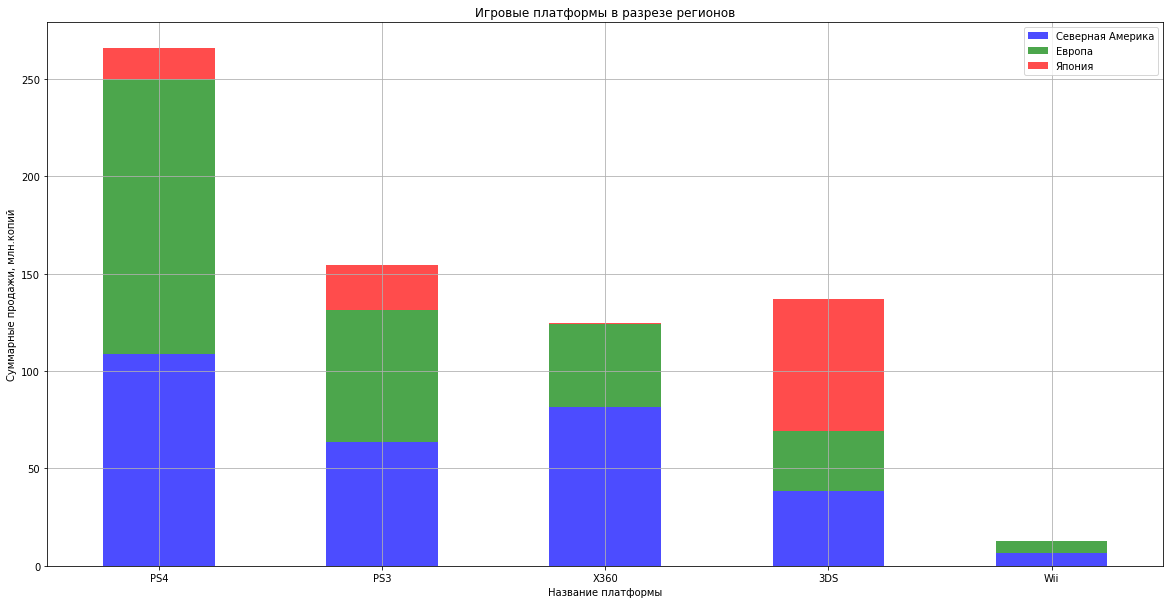

In [77]:
sales_by_region_platform[
    [
        'na_sales', 
        'eu_sales', 
        'jp_sales'
    ]
                        ].sort_values(
    by='eu_sales', 
    ascending=False
                                     ).head(10).plot(
    kind='bar',
    alpha=0.7,
    grid=True,
    figsize=(20, 10),
    stacked=True,
    xlabel='platform',
    color=['blue', 'green', 'red'],
    rot='horizontal',
    title='Игровые платформы в разрезе регионов',
    ylabel='Суммарные продажи, млн.копий'
                                                                   )


plt.legend(['Северная Америка', 'Европа', 'Япония'], loc='upper right')
plt.xlabel('Название платформы')
plt.show()

У пользователей магазина `Стримчик` из разных регионов нашей планеты явно наблюдаются различия в части предпочтений игровых платформ. В Северной Америке и Европе самой популярной платформой выступает `PS4` с общей долей продаж игр (за промежуток с 2013 по 2016 год) около 250 млн. копий. Второе место у покупателей Старого и Нового Света различается. В Северной Америке популярны игры на платформе `X360`, в то время, как в Европе предыдущее поколение `PlayStation`. К слову, в Японии также вторым по популярности выступает `PS3`, выигрывающее у `PS4`. Возможно это объясняется некоторым консерватизмом публики. 

Несмотря на тот факт, что общие объёмы рынка Японии гораздо меньше, нежели американские и европейские, самой популярной платформой там выступает мобильная платформа `3DS`, число продаж которой выше аналогичных продажам в других регионах (где занимает лишь 4-е место в рейтинге популярности). Это опять же объяснимо простым фактом - платформа `3DS` японского производства, что важно для потребителей. 

Видно, что североамериканский рынок больше европейского и гораздо больше японского.

### Топ-5 самых популярных жанров
<span style="color:green">
Определите для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). Поясните разницу.
<span>

In [78]:
sales_by_region_genre = pd.pivot_table(
    data_actual_period, 
    values=[
        'na_sales', 
        'eu_sales', 
        'jp_sales'
                        ], 
    index='genre', 
    aggfunc='sum'
                                         )
sales_by_region_genre.sort_values(by='genre')

,eu_sales,jp_sales,na_sales
genre,,,
Action,93.59,32.77,93.83
Adventure,5.93,3.14,5.18
Fighting,6.34,5.97,10.44
Misc,14.54,4.99,19.15
Platform,9.57,2.34,9.61
Puzzle,0.61,0.91,0.21
Racing,12.46,0.88,5.28
Role-Playing,29.27,42.49,36.24
Shooter,62.19,4.86,67.03


#### Топ-5 жанров игр в Северной Америке

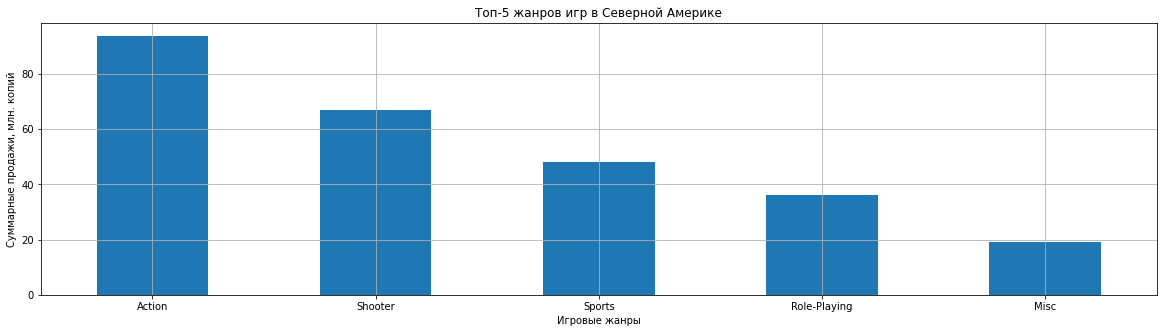

In [79]:
top_na_genres = sales_by_region_genre.sort_values(by='na_sales', ascending=False)['na_sales'].head(5)

top_na_genres.plot(
    kind='bar',
    figsize=(20,5), 
    title='Топ-5 жанров игр в Северной Америке', 
    xlabel='Игровые жанры', 
    ylabel='Суммарные продажи, млн. копий',
    grid=True,
    rot='horizontal'
                  )
plt.show()

#### Топ-5 жанров игр в Европе

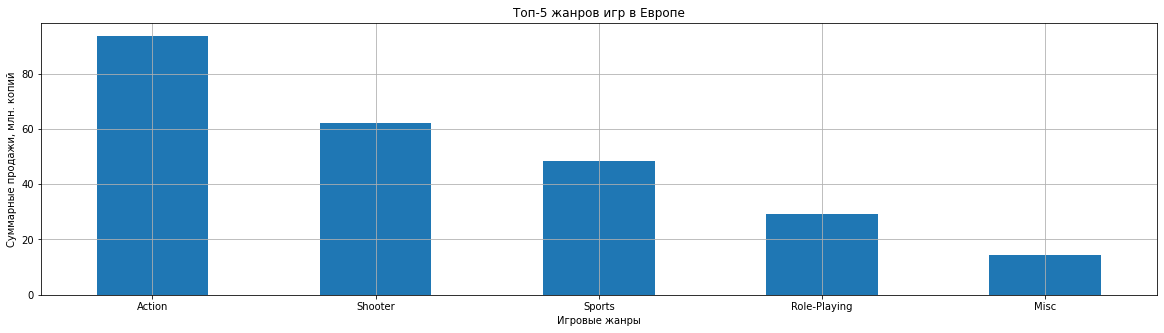

In [80]:
top_eu_genres = sales_by_region_genre.sort_values(by='eu_sales', ascending=False)['eu_sales'].head(5)

top_eu_genres.plot(
    kind='bar',
    figsize=(20,5), 
    title='Топ-5 жанров игр в Европе', 
    xlabel='Игровые жанры',
    ylabel='Суммарные продажи, млн. копий',
    grid=True,
    rot='horizontal'
                  )
plt.show()

#### Топ-5 жанров игр в Японии

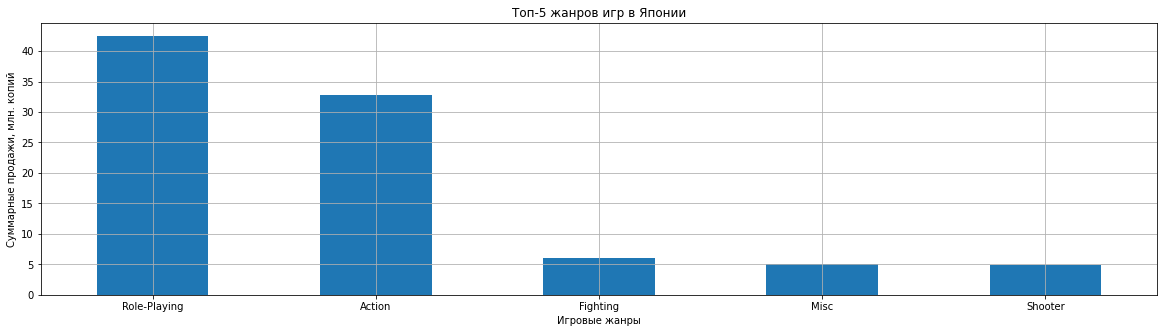

In [81]:
top_jp_genres = sales_by_region_genre.sort_values(by='jp_sales', ascending=False)['jp_sales'].head(5)

top_jp_genres.plot(
    kind='bar',
    figsize=(20,5), 
    title='Топ-5 жанров игр в Японии', 
    xlabel='Игровые жанры',
    ylabel='Суммарные продажи, млн. копий',
    grid=True,
    rot='horizontal'
                  )
plt.show()

#### Различия в долях продаж

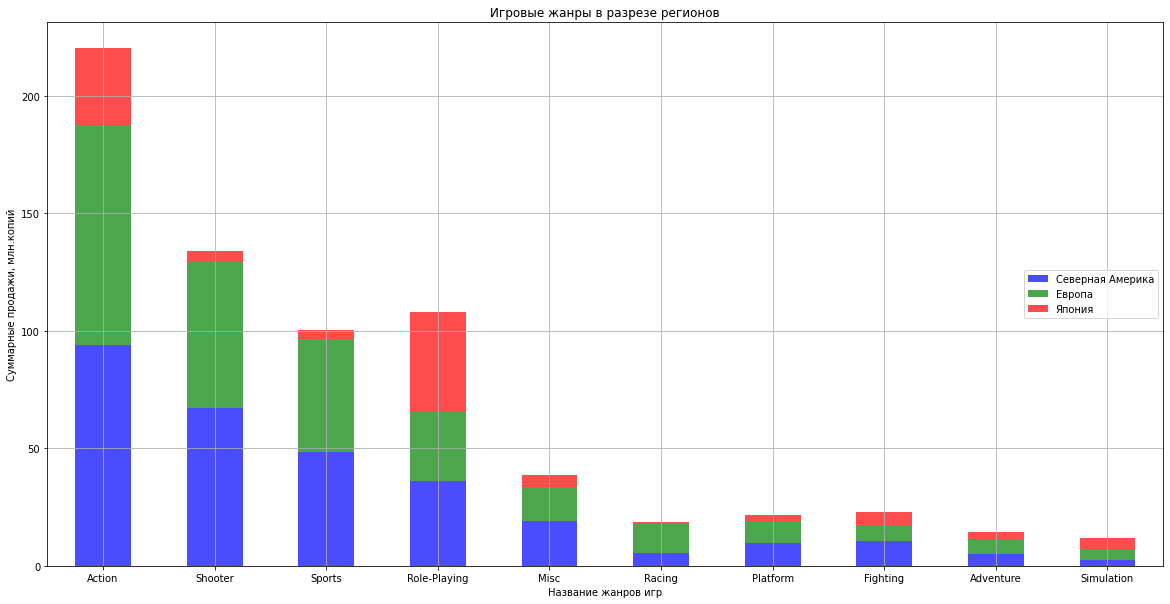

In [82]:
sales_by_region_genre[
    [
        'na_sales', 
        'eu_sales', 
        'jp_sales'
    ]
                      ].sort_values(
    by='eu_sales', 
    ascending=False
                                   ).head(10).plot(
    kind='bar',
    alpha=0.7,
    grid=True,
    figsize=(20, 10),
    stacked=True,
    xlabel='rating',
    color=['blue', 'green', 'red'],
    rot='horizontal',
    ylabel='Суммарные продажи, млн.копий'
                                                                   )


plt.title('Игровые жанры в разрезе регионов')
plt.xlabel('Название жанров игр')
plt.legend(['Северная Америка', 'Европа', 'Япония'], loc='right')

plt.show()

В Европе и Северной Америке самым популярным жанров за рассматриваемый период с 2013 по 2016 годы выступает `Action`. Этот же жанр в Японии находится на втором по популярности месте. Входящие в Топ-5 в Европе и СА `RPG` лидируют с явным отрывом в Японии. 

Вообще североамериканские жанровые предпочтения покупателей очень похожи на европейские. А вот отличие японского рынка по части жанровых предпочтений можно обосновать национальными особенностями. Например, жанр `Shooter` входит в лидеры рейтинга страны восходящего Солнца, но лишь на 5-м месте, что явно отличает покупателей данного региона от европейских и заокеанских покупателей, где стрелялки уступают лишь экшнам. 

### Влияние рейтинга ESRB на продажи в регионе
<span style="color:green">
Определите для пользователя каждого региона (NA, EU, JP) влияет ли рейтинг ESRB на продажи в отдельном регионе?
<span>

In [83]:
sales_by_region_rating = pd.pivot_table(
    data_actual_period, 
    values=[
        'na_sales', 
        'eu_sales', 
        'jp_sales'
                        ], 
    index='rating', 
    aggfunc='sum'
                                         )

sales_by_region_rating.sort_values(by='rating')

,eu_sales,jp_sales,na_sales
rating,,,
E,59.73,9.52,51.65
E10+,28.90,3.29,35.39
M,109.33,12.26,111.83
R-S,61.75,67.73,66.90
T,28.60,14.88,32.89


#### Топ-5 самых продаваемых рейтингов игр в Северной Америке

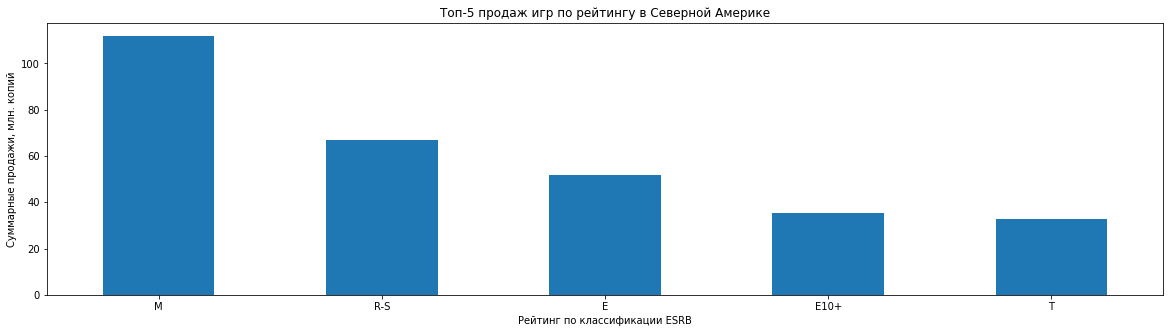

In [84]:
top_na_rating = sales_by_region_rating.sort_values(by='na_sales', ascending=False)['na_sales'].head(5)

top_na_rating.plot(
    kind='bar',
    figsize=(20,5), 
    title='Топ-5 продаж игр по рейтингу в Северной Америке', 
    xlabel='Рейтинг по классификации ESRB', 
    ylabel='Суммарные продажи, млн. копий',
    rot='horizontal'
                  )
plt.show()

#### Топ-5 самых продаваемых рейтингов игр в Европе

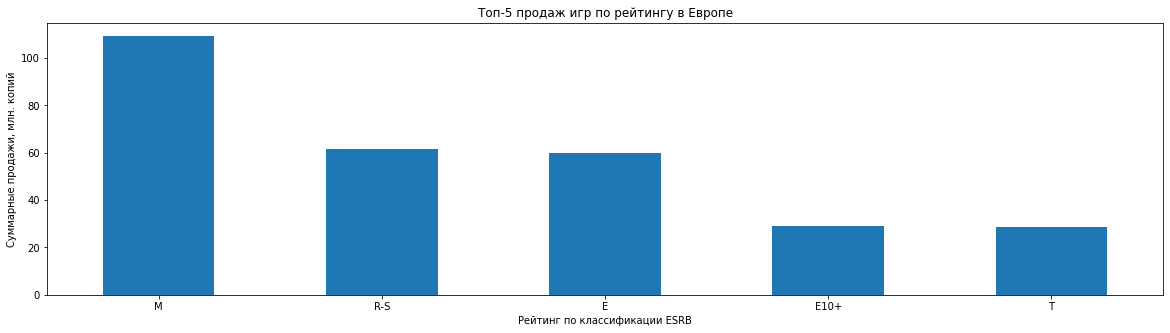

In [85]:
top_eu_genres = sales_by_region_rating.sort_values(by='eu_sales', ascending=False)['eu_sales'].head(5)

top_eu_genres.plot(
    kind='bar',
    figsize=(20,5), 
    title='Топ-5 продаж игр по рейтингу в Европе', 
    xlabel='Рейтинг по классификации ESRB', 
    ylabel='Суммарные продажи, млн. копий',
    rot='horizontal'
                  )
plt.show()

#### Топ-5 самых продаваемых рейтингов игр в Японии

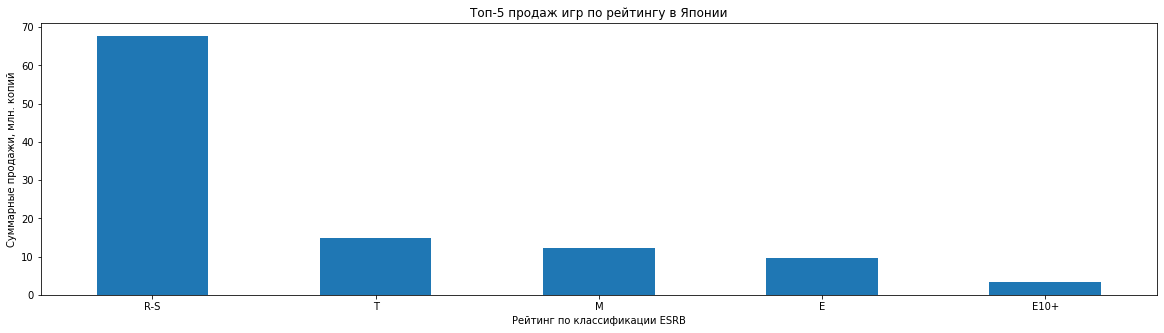

In [86]:
top_jp_genres = sales_by_region_rating.sort_values(by='jp_sales', ascending=False)['jp_sales'].head(5)

top_jp_genres.plot(
    kind='bar',
    figsize=(20,5), 
    title='Топ-5 продаж игр по рейтингу в Японии', 
    xlabel='Рейтинг по классификации ESRB', 
    ylabel='Суммарные продажи, млн. копий',
    rot='horizontal'
                  )
plt.show()

#### Различие в долях продаж



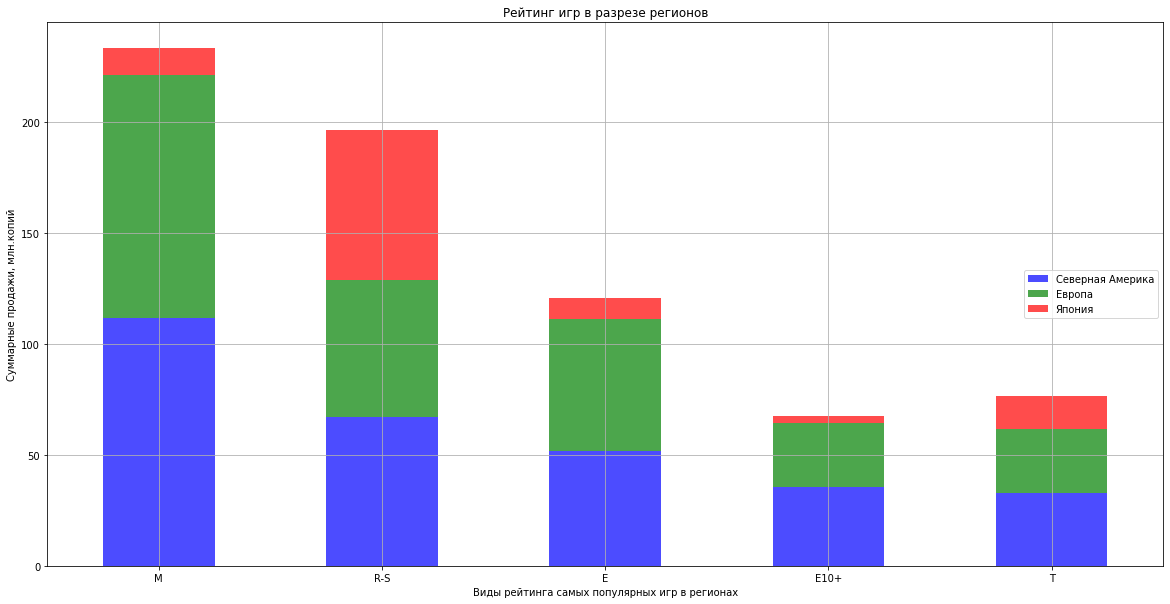

In [87]:
sales_by_region_rating[
    [
        'na_sales', 
        'eu_sales', 
        'jp_sales'
    ]
                      ].sort_values(
    by='eu_sales', 
    ascending=False
                                   ).plot(
    kind='bar',
    alpha=0.7,
    grid=True,
    figsize=(20, 10),
    stacked=True,
    xlabel='rating',
    color=['blue', 'green', 'red'],
    rot='horizontal',
    ylabel='Суммарные продажи, млн.копий'
                                                                   )


plt.title('Рейтинг игр в разрезе регионов')
plt.xlabel('Виды рейтинга самых популярных игр в регионах')
plt.legend(['Северная Америка', 'Европа', 'Япония'], loc='right')

plt.show()

Рейтинговые предпочтения по классификации ESRB из рассматриваемых регионов крайне похожи в случае Европы и Северной Америки. Самые популярности в Европе и СА игры рассчитаны на пользователей _взрослой_ категории (после 17 лет) `M`. А вот в Японии (а также вторые по популярности в СА и Европе) наиболее популярная введённая нами категория `Ы`. Как мы условились [выше](#Обработка-пропусков-для-столбца-rating), это абстрактная категория, включающая игры преимущественно жанров Action, Misc, Adventure и Sports, появившаяся вследствие странных перипетий североамериканского рынка. Да, это игры это категорий с возрастными ограничениями. 

Крайне характерно, что для американцев и европейцев далее среди самых популярных фигурируют игры рейтинг `E`, т.е. _для всех_. Но ещё более характерно, что на японском рынке востребованы игры для подростков (категория `T`).

## Общий вывод

В рамках Проектной работы перед нами стояла цель выявить закономерности, определяющие успешность продаваемых в интернет-магазине `Стримчик` игр. Для этой цели был предоставлен датасет в виде файла формата `*.csv`, содержащий информацию за промежуток времени с 1980 года по 2016 (включительно). На основе собранных данных требовалось выявить потенциально популярные продукты и спланировать рекламные кампании для последующих продаж, начиная с торговой кампании 2017 года.

1. В представленном датасете не все данные были пригодны для использовании в исследовательском анализе. Ввиду этого для решения поставленной цели был предпринят ряд шагов, нацеленных на подготовку данных. Выяснилось, что датасет в ряде параметров содержит пропуски, для устранения которых проводилась отдельная работа. Число имеющихся пропусков в параметрах `Название игры`, `Жанр` и `Год выпуска` оказались достаточно мало по сравнению с размером датасета, поэтому после проведения оценки, строки, содержащие пропуски, были удалены. В параметре `Оценка пользователей` фигурировали не только пропуски, но и значения `tbd` (_to be determined_). Исследование показало, что в датасете существуют данные об играх, в которых пользователи не выносили оценку игре. Было выполнено замещение tbd средним значением, но только для строк, содержащих аналогичные значения в столбцах `name` и `platform`. Имеющиеся пропуски в строках параметра `Оценка критиков` было решено оставить, т.к. в результате других действий число таких строк существенно уменьшилось. 

    Наконец для устранения выявленных пропусков для параметра `Рейтинг игры` был задействован междисциплинарный синергетический подход, в ходе которого выявлена зависимость между жанрами и годами выпуска игр. На основании данных выводов была спроецирована ситуация о влиянии на различные рынки продажи игр из интернет-магазина. После чего от таких пропусков было решено не отказываться, а идентифицировать их особым образом, дабы использовать в дальнейшем в ходе Проектной работы. Более подробно об этом будет сказано ниже.

2. Помимо вышеуказанного в рамках предобработки данных был выполнен отдельный блок работ, направленных на выявление неявных дубликатов в датасете. Для этого данные были проверены на наличие дублирующих значений пар `Название игры - Игровая платформа`. Выявленные неявные дубликаты были удалены. Также был проведён поиск аномальных значений, однако он не выявил наличие сколь-угодно выбивающихся строк в составе датасете. Отдельно необходимо отметить проведённое преобразование данных в типы данных, наиболее характерные для обрабатываемых значений. Для возможности оперирования суммами продаж в ходе исследования датасета был добавлен ещё один столбец `total_sales`, отвечающий за суммарные продажи по всем регионам для выбранной игры. Данной переменной назначен вещественный тип данных.

3. В ходе исследовательского анализа для выявления наиболее популярных продуктов было осуществлено несколько действий. Выполнена группировка перечня игр по принципу `Название игры - Год выпуска` в разрезе количества проданных игр. Таким образом, мы выявили, сколько игр продавалось через интернет-магазин без учёта различия платформ. Выявлено, что **больше всего игр продавалось в 2008-2009 годах** (около 1000 ежегодно), а если не учитывать различия в платформах, то продажи составили около 1400 игр. 

    С 2013 по 2016 год заметен спад продаж игр (в районе 350-400 игр без учёта платформы). Поскольку для решения поставленной цели Проектной работы (планирование продаж на 2017 и последующий годы) оптимально выбрать интервал в 2-3 года, то мы далее оперируем именно этими датами (данные по 2016 году неполные, так что данное неписанное правило лишь подтверждается).

4. В ходе анализа продаж был построен график с отображением 10 самых продаваемых платформ в их распределении по годам. Популярность платформ определена на основе значений параметра `Суммарные продажи`, добавленного ранее. Для каждой платформы подсчитаны суммирующие продажи, но отображаются только 10 из них. По графику можно наблюдать жизненный цикл платформ, составляющий **10-12 лет** с момент своего появления до полного прекращения спроса и, как следствие, прекращение техподдержи. 

    Для топовых платформ характерен относительно спокойный взлёт, а затем падение до появления новой версии платформы. **Интервал появления новой версии составляет около 7 лет**.

    Для ряда топовых платформ, либо модификаций платформ (`GBA`, `PS2`, `PS3`, `DS`, `X360`) наблюдается характерный выход на плато продаж с последующим падением и выправлением ситуации на грядущий год. Видимо это связано с компенсирующими факторами (например, проведение яркой рекламной программы), предпринимаемые организациями-разработчиками игры для возобновления интереса к своим продуктам на указанных платформах.

5. Жизненный цикл может сильно варьироваться в зависимости от конкретной платформы и ситуации на рынке видеоигр. Так платформа `DS` от фирмы `Nintendo` существовала с 1980-х, завершив продажи к 2013 году. Делаем вывод, что, в отличие от серии фирмы `PlayStation` (в датасете присутствует каждая модель игровой приставки), для `DS` различные версии не рассматривались, а вся информация сведена воедино. При этом необходимо отметить тот факт, что ближе к **2013** году на рынке появляются модификации платформы (например, `3DS`), а в интервале с 2005 по 2008 годы и вовсе наблюдался всплеск интереса.

6. Лидер по продажам интернет-магазина `Стримчик` с 2014 года - игры на платформе `PS4`. Также среди топовых платформ оказались следующие платформы: `3DS`, `PS3`, `Wii`, `X360`

7. Построена диаграмма размаха по глобальным продажам в разбивке по платформам. Медианное значение для платформ на графике показывает, какие суммарные продажи наиболее типичны для каждой из игровых платформ. _Наиболее высокий типичный уровень продаж_ игр у платформы `X360`. Для лидирующих платформ продажи варьируются на уровне от 100 до 300 тысяч копий продаж в интернет-магазине `Стримчик`.

    Также крайне показательным значением служат выбросы. В контексте продаж игр для разных платформ выбросы могут указывать на наличие очень успешных или неудачных игр на каждой из платформ (тут всё же случай, где больше успешных продаж). Так несомненный бестселлер для платформы `PS3` принёс доход магазину по стоимости, сопоставимый с продажей более 20 млн. копий.

8. Нижняя и верхняя квартили показывают низкие и высокие значения продаж для каждой платформы соответственно. Для каждой из платформ нижняя граница приблизительно соразмерно и находится в пределах от 40 тысяч (для `PS3` и `3DS`) до 80 тысяч (для `X360`), а верхняя граница различается существенно (для платформы `X360` верхняя граница составляет 795 тысяч копий). Представленный на графике интерквартильный размах является диапазоном сумм продаж. Для `X360` этот показатель составляет **715 тысяч копий**. При этом крайне важно, что **наиболее востребованная в 2015-2016** годах платформа `PS4` выдаёт также сопоставимый результат в 670 тысяч для диапазона наиболее типичных продаж.

    Наименее перспективной платформой из представленного списка на диаграмме размаха, на наш взгляд, выступает `3DS`. Однако, как будет показано в отчёте далее, это платформа выделяется успехом конкретно на японском рынке.

9. По диаграмме рассеивания показана связь между суммарными продажами игр на платформе и выставленными оценками пользователей и критиков данным графикам видна слабая зависимость между оценками, что критиков, что пользователей, и продажами игр для `PS4`. График зависимости оценок критиков и суммарных продаж отображает ситуацию, когда самая продаваемая игра также является и самой хвалебной со стороны критиков. Наиболее прибыльные игры получали, как правило, оценку выше 70 баллов от критиков. При этом в сегменте продаж до 2 млн.копий разброс оценок крайне высок. Между оценками критиков и общим объемом продаж на платформе PS4 есть умеренная положительная связь (40%), что означает ситуацию, когда игры с более высокими оценками критиков, скорее всего, имеют больший успех среди покупателей. При этом коэффициент корреляции не очень высокий, поэтому этот фактор может быть не единственной причиной успеха игры на платформе. Другие факторы, такие как маркетинговая кампания, жанр игры, качество графики и геймплея, могут оказывать большее влияние на продажи. Встречаются выбросы, которые на общую картину влияют в некоторой, достаточно слабой степени.

    Ситуация с оценками пользователей слегка отличается. Самая продаваемая игра имеет хвалебные оценки, но далеко не самые высокие. Более того, для игр в районе продаж около 4 млн. копий (а не только до 2 млн., как для оценок критиков) разброс пользовательских оценок достаточно широк. Что говорит о более слабой зависимости от продаж. Если говорить более детально, то корреляция между отзывами пользователей и продажами игр на платформе `PS4` составляет около -3%, т.е. оценки пользователей не имеют значительного влияния на продажи игр. Это может быть связано с тем, что оценки пользователей могут быть более субъективными и зависеть от личных предпочтений, в то время как оценки критиков обычно основаны на более объективных критериях. Иначе говоря, оценки пользователей оказывают незначительное влияние на объем продаж игр на платформе `PS4`. Наблюдается, что большинство игр имеют средние (от 5,5 баллов) и выше оценки пользователей, но относительно небольшие продажи. Фигурируют выбросы, игры с высокими продажами и высокими оценками, которые могут повлиять на общую картину.
    
10. Для менее популярных платформ (за выбранный интервал лет) коэффициент корреляции между оценками пользователей и суммарными продажами разнообразный и варьируется от -0.01 до 0.68, что говорит о различной связи между этими переменными для разных платформ. Данное сравнение с PS4 (коэффициент корреляции 0.40), говорит о более сильной связи между оценками пользователей и продажами на этой платформе, чем у актуального поколения `PlayStation` за исследуемый период.

    Для всех платформ, кроме `Wii`, можно сделать вывод, что оценки критиков имеют некоторое влияние на продажи игр. Наибольшее влияние оценки критиков оказывают на продажи игр для `PS3` и `X360`. Однако точно утверждать об имеющейся линейной зависимости нельзя. 
    
11. Анализ общего распределения продаваемых игр по жанрам показал следующие моменты. Самые популярные игры относятся к жанру `Shooter`. Это говорит, что в данном разрезе игры более оптимально продаются, если речь идёт именно о распределении, а не о продаже общего числа игр. Медианное значение продаж игр жанра `Action` слабо выделяется на фоне иных жанров, а вот от лидеров отстаёт существенно. При этом суммарное значение продаж игр жанра `Action` сильно превышает значения в сравнении с другими платформами. Скорее всего, среди экшна много проходных игр, жизненный цикл которых короток. При планировании продаж на 2017 и последующий годы этот факт необходимо учитывать. 

    При выполнении работ по п.1 в ходе решения задачи обработки пропусков для параметра `rating` был выполнен анализ отношения игр различных жанров, но, главным образом, жанра `Action` к рейтингу в разрезе годов выхода. Ввиду этого необходимо добавить пояснение. Далеко не все игры попали в данное распределение, так что вовсе списывать экшн и иные жанры не стоит, сделав на них ставку, но не в первую очередь.

    Среди "аутсайдеров" значится жанры `Strategy` и `Puzzle`. Данный сегмент игр имеет своего покупателя, но, судя по анализу, не выбивается за его пределы.
    
12. В Северной Америке и Европе самой популярной платформой выступает `PS4` с общей долей продаж игр (за промежуток с 2013 по 2016 год) **около 250 млн. копий**. Второе место у покупателей Старого и Нового Света различается. В Северной Америке популярны игры на платформе `X360`, в то время, как в Европе предыдущее поколение `PlayStation`, т.е. `PS3`. В Японии также вторым по популярности выступает `PS3`, выигрывающее у `PS4`. Предполагаем, что это объясняется некоторым консерватизмом азиатской публики.

    Общие объёмы рынка Японии гораздо меньше, нежели американские и европейские. Выявлено, что североамериканский рынок больше европейского и гораздо больше японского. Этот факт необходимо учитывать при планировании продаж на 2017 год. 
    
    Самой популярной платформой в Японии выступает мобильная платформа `3DS`, число продаж которой выше аналогичных продажам в других регионах (где занимает лишь 4-е место в рейтинге популярности). Это опять же объяснимо простым фактом - платформа 3DS японского производства, что важно для потребителей.

13. В Европе и Северной Америке самым популярным жанров за рассматриваемый период с 2013 по 2016 годы выступает `Action`. Тут речь идёт о продажах игр в сумме для различных платформ, в т.ч. картину могут формировать и платформы, не попавшие в Топ-5. Этот же жанр в Японии находится на втором по популярности месте. Входящие в Топ-5 в Европе и СА игры жанра `RPG` лидируют с явным отрывом в Японии.

    В целом жанровые предпочтения североамериканских покупателей очень похожи на европейские. А вот отличие японского рынка по части жанровых предпочтений можно обосновать национальными особенностями. Например, жанр `Shooter` входит в лидеры рейтинга страны восходящего Солнца, но лишь на 5-м месте, что явно отличает покупателей данного региона от европейских и заокеанских покупателей, где агрессивные игры с присутствием большого элемента насилия уступают лишь динамичным приключенческим жанрам (Action).

14. Рейтинговые предпочтения по классификации `ESRB` из рассматриваемых регионов крайне похожи в случае Европы и Северной Америки. Самые популярности в Европе и Северной Америке игры рассчитаны на пользователей взрослой `категории M` (после 17 лет). А вот в Японии (эта же категория вторая по популярности в Северной Америке и Европе) наиболее популярная введённая нами `категория Ы`, представляющая собой пропуски в первоначальном датасете. Как мы условились выше, это абстрактная категория, включающая игры преимущественно жанров `Action`, `Misc`, `Adventure` и `Sports`, появившаяся вследствие странных перипетий североамериканского рынка. По факту это игры категорий с возрастными ограничениями.

    Крайне характерно, что для американцев и европейцев среди самых популярных фигурируют игры `категории E`, т.е. _игры для всех_. Но ещё более характерно, что на японском рынке востребованы _игры для подростков_ (`категория T`).
    
15. Подводя итог, можно выделить направления, куда необходимо стремиться интернет-магазину `Стримчик` для получения максимальной прибыли в 2017 году. Основной упор в продажах нужно сосредоточить на играх, базирующихся на платформах `PS4` и `X360`, что наиболее востребовано на североамериканском рынке (в меньшей степени, на европейском рынке), который лидирует по доходам. В последующие за 2017 годы можно ожидать новые релизы платформ, продажи которых в первые год-два будут успешны. Сосредотачиваться на платформах, которые на рынке фигурируют около 7-10 лет возможно, но доходы в этом случае будут сложнопредсказуемы и малы. Целевая аудитория интернет-магазина на 2017 год - взрослые люди, выбирающие игры либо для всей семьи, либо 17+. Игры для детей, как и игры для взрослых сильно не востребованы, хотя утвердительно говорить об этом нельзя. Наиболее успешные жанры в долгосрочной перспективе - _Shooter_, _RPG_, _Platform_, _Sport_, _Racing_. Если нужны быстрые продажи, то крайне пользуются успехом также игры жанры _Action_. Для японского рынка рекомендации представлены выше, но вкратце портрет потребителя там отличается с упором на использования мобильных платформ и более подростковую аудиторию.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА v.1</b></u></font>
    <br />
    </div>

1. Про пропуски указал в [соответствующем разделе](#Обработка-пропусков-для-столбца-rating)
    
2. Переделано

3. Переделано

4. Совет применён (см. раздел [Поиск и устранение неявных дубликатов](#Поиск-и-устранение-неявных-дубликатов))

5. Интервал взят с 2013 года (как раз 3 с небольшим года)
   
6. Сделано
    
7. От _заглушек_ было избавлено
    
8. Выполнено сравнение суммарных продаж и продаж медианных/средних; сделаны соответствующие выводы
    
9. Игры без рейтинга выделены в отдельную категорию и проанализировал (см.п.1)
    
10. Вывод расписан

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>

Илья - всё принимается. Рад был работать с тобой над проектом, коллега! ПРИНЯТО!</div>
